In [1]:
# Importing all library needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from hyperopt import hp, fmin, tpe, Trials
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import warnings;
warnings.filterwarnings('ignore')

In [2]:
# Loading the training data

data = pd.read_csv("dseats_2024_training_dataset.csv", parse_dates=[0])

In [3]:
data.head(10)

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2014-07-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
1      2014-08-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
2      2014-09-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
3      2014-10-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
4      2014-11-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
5      2014-12-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
6      2014-04-13      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
7      2014-04-14      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
8      2014-04-15      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
9      2014-04-16      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP                 0.000000   
1  production        OP                 0.000000   
2  production        OP                 0.000000   
3  production        OP                 0.000000   
4  production        OP              4500.454030   
5  production        OP              4400.761310   
6  production        OP              4401.254745   
7  production        OP              4404.843060   
8  production        OP              4405.944045   
9  production        OP              4404.982115   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                      273.15000                 0.000000   
1                      273.15000                 0.000000   
2                      273.15000                 0.000000   
3                      273.15000                 0.000000   
4                      370.02589              4020.534770   
5                      370.07339              4080.987880   
6                      370.10885              4002.464000   
7                      370.11873              4100.408020   
8                      370.17136              4204.139715   
9                      370.21569              4345.242985   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0       0.000000     0.00000   
1                     0.0       0.000000     0.00000   
2                     0.0       0.000000     0.00000   
3                     0.0       0.000000     0.00000   
4                     0.0     479.919260    33.07195   
5                     0.0     319.773430    22.05334   
6                     0.0     398.790745    16.16326   
7                     0.0     304.435040    20.73712   
8                     0.0     201.804330    12.18153   
9                     0.0      59.739130     1.49020   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  
0                       0.0                   0.0                         0.0  
1                       0.0                   0.0                         0.0  
2                       0.0                   0.0                         0.0  
3                       0.0                   0.0                         0.0  
4                       0.0                   0.0                         0.0  
5                       0.0                   0.0                         0.0  
6                       0.0                   0.0                         0.0  
7                       0.0                   0.0                         0.0  
8                       0.0                   0.0                         0.0  
9                       0.0                   0.0                         0.0

In [4]:
data.describe().T

count          mean           std        min  \
N_WELL_BORE_CODE               9000.0  1.072614e+02  1.080071e+00   105.0000   
Downhole Pressure (PSI)        9000.0  2.629741e+03  1.593945e+03     0.0000   
Downhole Temperature (Kelvin)  9000.0  3.501315e+02  4.575870e+01   273.1500   
Average Tubing Pressure        9000.0  2.227897e+03  1.116496e+03     0.0000   
Annulus Pressure (PSI)         9000.0  1.842161e+02  1.354726e+02     0.0000   
AVG WHP (PSI)                  9000.0  6.638135e+02  3.587492e+02     0.0000   
Choke Size                     8994.0  1.948879e+01  2.263023e+01     0.0000   
Oil Production (stb/day)       6925.0  8.494775e+03  8.927597e+03     0.0000   
Gas Volume (scf/day)           6925.0  6.978690e+06  7.100875e+06     0.0000   
Water Production (stb/day)     6925.0  1.148056e+04  1.148448e+04 -2879.8136   

                                        25%           50%           75%  \
N_WELL_BORE_CODE               1.070000e+02  1.070000e+02  1.080000e+02   
Downhole Pressure (PSI)        0.000000e+00  3.374028e+03  3.702622e+03   
Downhole Temperature (Kelvin)  2.731500e+02  3.762998e+02  3.794233e+02   
Average Tubing Pressure        1.068720e+03  2.544713e+03  2.961725e+03   
Annulus Pressure (PSI)         0.000000e+00  2.143637e+02  2.988293e+02   
AVG WHP (PSI)                  4.554914e+02  5.556652e+02  8.377588e+02   
Choke Size                     3.480090e+00  9.887379e+00  2.739997e+01   
Oil Production (stb/day)       1.686601e+03  5.479471e+03  1.173047e+04   
Gas Volume (scf/day)           1.434288e+06  4.770461e+06  9.892230e+06   
Water Production (stb/day)     8.032330e+01  5.529413e+03  2.226151e+04   

                                        max  
N_WELL_BORE_CODE               1.090000e+02  
Downhole Pressure (PSI)        5.765034e+03  
Downhole Temperature (Kelvin)  3.816522e+02  
Average Tubing Pressure        5.015648e+03  
Annulus Pressure (PSI)         4.352875e+02  
AVG WHP (PSI)                  1.991010e+03  
Choke Size                     1.257186e+02  
Oil Production (stb/day)       3.712257e+04  
Gas Volume (scf/day)           3.004494e+07  
Water Production (stb/day)     5.044416e+04

In [5]:
data.isnull().sum()

PRODUCTION DATE                     0
Field Name                          0
WELL_BORE_CODE                      0
N_WELL_BORE_CODE                    0
WellBore Name                       0
FLOW_KIND                           0
WELL_TYPE                           0
Downhole Pressure (PSI)             0
Downhole Temperature (Kelvin)       0
Average Tubing Pressure             0
Annulus Pressure (PSI)              0
AVG WHP (PSI)                       0
Choke Size                          6
Oil Production (stb/day)         2075
Gas Volume (scf/day)             2075
Water Production (stb/day)       2075
dtype: int64

In [6]:
prod = data.copy()

In [7]:
prod['year'] = data['PRODUCTION DATE'].dt.year

In [8]:
prod['month'] = data['PRODUCTION DATE'].dt.month

In [9]:
prod['day'] = data['PRODUCTION DATE'].dt.day

In [10]:
prod.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2014-07-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
1      2014-08-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
2      2014-09-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
3      2014-10-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
4      2014-11-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP                  0.00000   
1  production        OP                  0.00000   
2  production        OP                  0.00000   
3  production        OP                  0.00000   
4  production        OP               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                      273.15000                  0.00000   
1                      273.15000                  0.00000   
2                      273.15000                  0.00000   
3                      273.15000                  0.00000   
4                      370.02589               4020.53477   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0        0.00000     0.00000   
1                     0.0        0.00000     0.00000   
2                     0.0        0.00000     0.00000   
3                     0.0        0.00000     0.00000   
4                     0.0      479.91926    33.07195   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  \
0                       0.0                   0.0                         0.0   
1                       0.0                   0.0                         0.0   
2                       0.0                   0.0                         0.0   
3                       0.0                   0.0                         0.0   
4                       0.0                   0.0                         0.0   

   year  month  day  
0  2014      7    4  
1  2014      8    4  
2  2014      9    4  
3  2014     10    4  
4  2014     11    4

In [11]:
prod['lag1'] = data['Downhole Pressure (PSI)'].shift(1)

In [12]:
prod['lag2'] = data['Downhole Temperature (Kelvin)'].shift(1)

In [13]:
prod['lag3'] = data['AVG WHP (PSI)'].shift(1)

In [14]:
prod['lag4'] = data['Average Tubing Pressure'].shift(1)

In [15]:
prod['lag5'] = data['Annulus Pressure (PSI)'].shift(1)

In [16]:
prod['lag6'] = data['Choke Size'].shift(1)

In [17]:
prod.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2014-07-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
1      2014-08-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
2      2014-09-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
3      2014-10-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
4      2014-11-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP                  0.00000   
1  production        OP                  0.00000   
2  production        OP                  0.00000   
3  production        OP                  0.00000   
4  production        OP               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...  \
0                      273.15000                  0.00000  ...   
1                      273.15000                  0.00000  ...   
2                      273.15000                  0.00000  ...   
3                      273.15000                  0.00000  ...   
4                      370.02589               4020.53477  ...   

   Water Production (stb/day)  year  month  day  lag1    lag2  lag3  lag4  \
0                         0.0  2014      7    4   NaN     NaN   NaN   NaN   
1                         0.0  2014      8    4   0.0  273.15   0.0   0.0   
2                         0.0  2014      9    4   0.0  273.15   0.0   0.0   
3                         0.0  2014     10    4   0.0  273.15   0.0   0.0   
4                         0.0  2014     11    4   0.0  273.15   0.0   0.0   

   lag5  lag6  
0   NaN   NaN  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   0.0  
4   0.0   0.0  

[5 rows x 25 columns]

In [18]:
prod['Roll_mean_1'] = data['Downhole Pressure (PSI)'].rolling(window = 2).mean()

In [19]:
prod['Roll_mean_2'] = data['Downhole Temperature (Kelvin)'].rolling(window = 2).mean()

In [20]:
prod['Roll_mean_3'] = data['AVG WHP (PSI)'].rolling(window = 2).mean()

In [21]:
prod['Roll_mean_4'] = data['Average Tubing Pressure'].rolling(window = 2).mean()

In [22]:
prod['Roll_mean_5'] = data['Average Tubing Pressure'].rolling(window = 2).mean()

In [23]:
prod.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2014-07-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
1      2014-08-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
2      2014-09-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
3      2014-10-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
4      2014-11-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP                  0.00000   
1  production        OP                  0.00000   
2  production        OP                  0.00000   
3  production        OP                  0.00000   
4  production        OP               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...    lag2  lag3  \
0                      273.15000                  0.00000  ...     NaN   NaN   
1                      273.15000                  0.00000  ...  273.15   0.0   
2                      273.15000                  0.00000  ...  273.15   0.0   
3                      273.15000                  0.00000  ...  273.15   0.0   
4                      370.02589               4020.53477  ...  273.15   0.0   

   lag4  lag5  lag6  Roll_mean_1  Roll_mean_2  Roll_mean_3  Roll_mean_4  \
0   NaN   NaN   NaN          NaN          NaN          NaN          NaN   
1   0.0   0.0   0.0     0.000000   273.150000      0.00000     0.000000   
2   0.0   0.0   0.0     0.000000   273.150000      0.00000     0.000000   
3   0.0   0.0   0.0     0.000000   273.150000      0.00000     0.000000   
4   0.0   0.0   0.0  2250.227015   321.587945    239.95963  2010.267385   

   Roll_mean_5  
0          NaN  
1     0.000000  
2     0.000000  
3     0.000000  
4  2010.267385  

[5 rows x 30 columns]

In [24]:
prod['Expand_mean'] = data['Downhole Pressure (PSI)'].expanding().mean()

In [25]:
prod['Expand_mean_2'] = data['Downhole Temperature (Kelvin)'].expanding().mean()

In [26]:
prod['Expand_mean_3'] = data['AVG WHP (PSI)'].expanding().mean()

In [27]:
prod['Expand_mean_4'] = data['Average Tubing Pressure'].expanding().mean()

In [28]:
prod['Expand_mean_5'] = data['Average Tubing Pressure'].expanding().mean()

In [29]:
prod.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2014-07-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
1      2014-08-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
2      2014-09-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
3      2014-10-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   
4      2014-11-04      DSEAT  DSEAT-001-F-1 C               105     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP                  0.00000   
1  production        OP                  0.00000   
2  production        OP                  0.00000   
3  production        OP                  0.00000   
4  production        OP               4500.45403   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...  Roll_mean_1  \
0                      273.15000                  0.00000  ...          NaN   
1                      273.15000                  0.00000  ...     0.000000   
2                      273.15000                  0.00000  ...     0.000000   
3                      273.15000                  0.00000  ...     0.000000   
4                      370.02589               4020.53477  ...  2250.227015   

   Roll_mean_2  Roll_mean_3  Roll_mean_4  Roll_mean_5  Expand_mean  \
0          NaN          NaN          NaN          NaN     0.000000   
1   273.150000      0.00000     0.000000     0.000000     0.000000   
2   273.150000      0.00000     0.000000     0.000000     0.000000   
3   273.150000      0.00000     0.000000     0.000000     0.000000   
4   321.587945    239.95963  2010.267385  2010.267385   900.090806   

   Expand_mean_2  Expand_mean_3  Expand_mean_4  Expand_mean_5  
0     273.150000       0.000000       0.000000       0.000000  
1     273.150000       0.000000       0.000000       0.000000  
2     273.150000       0.000000       0.000000       0.000000  
3     273.150000       0.000000       0.000000       0.000000  
4     292.525178      95.983852     804.106954     804.106954  

[5 rows x 35 columns]

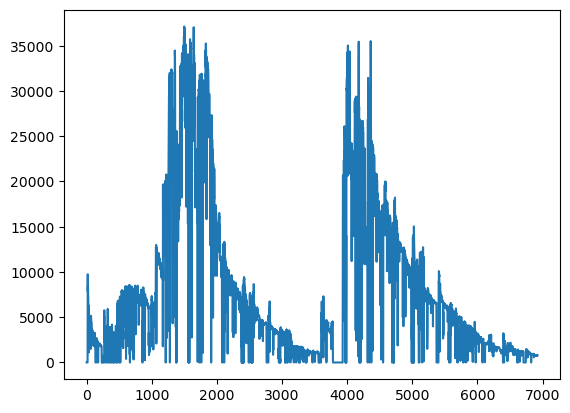

In [30]:
prod['Oil Production (stb/day)'].plot()
plt.show()

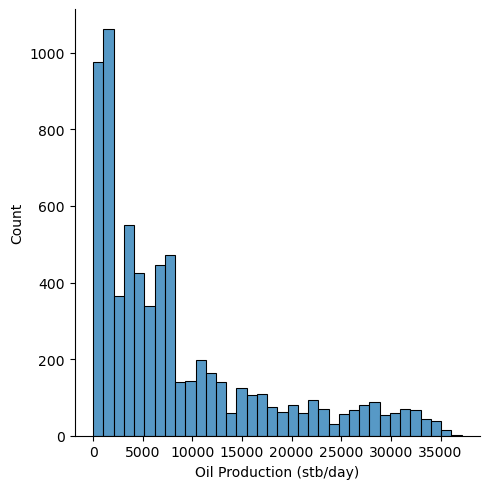

In [31]:
import matplotlib.pyplot as plt
sns.displot(prod['Oil Production (stb/day)'])
plt.show()

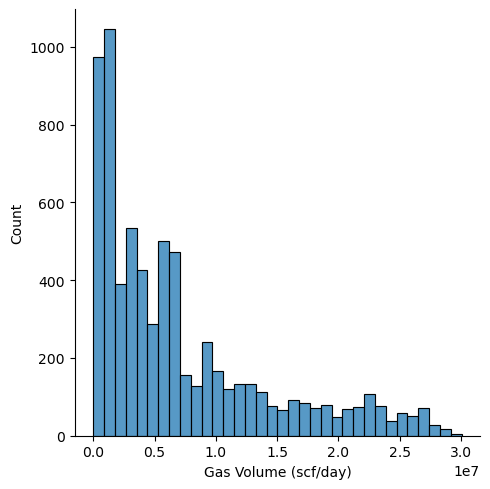

In [32]:
import matplotlib.pyplot as plt
sns.displot(prod['Gas Volume (scf/day)'])
plt.show()

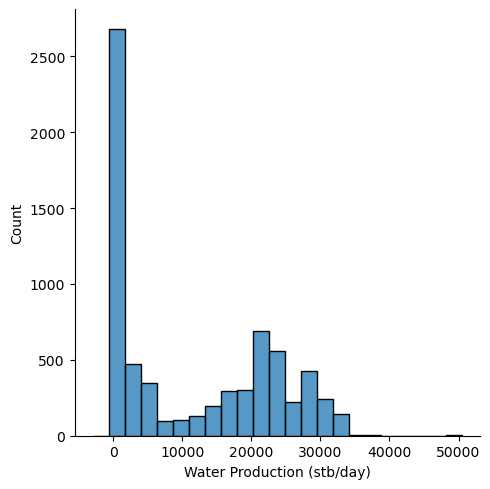

In [33]:
import matplotlib.pyplot as plt
sns.displot(prod['Water Production (stb/day)'])
plt.show()

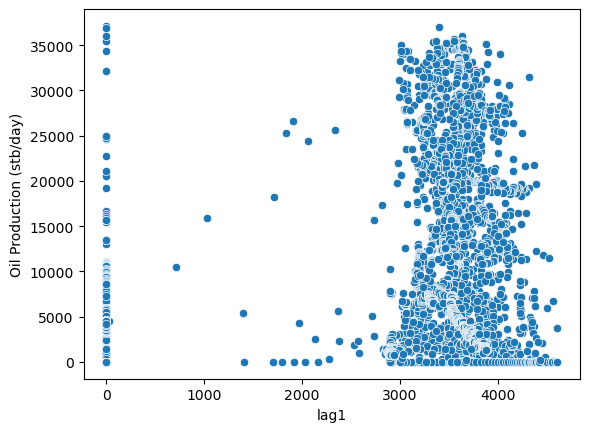

In [34]:
sns.scatterplot(x=prod['lag1'], y = prod['Oil Production (stb/day)'])
plt.show()

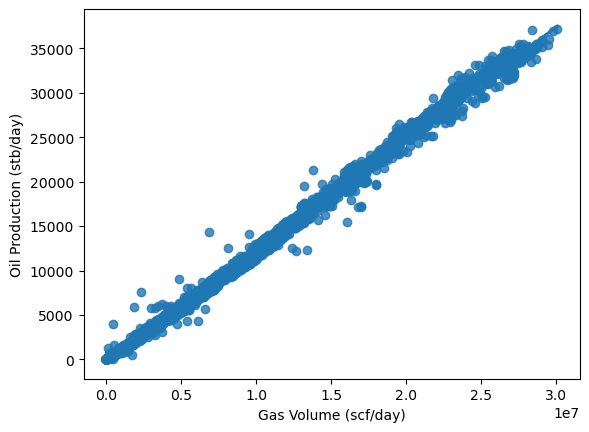

In [35]:
sns.regplot(x= prod['Gas Volume (scf/day)'], y = prod['Oil Production (stb/day)'])
plt.show()

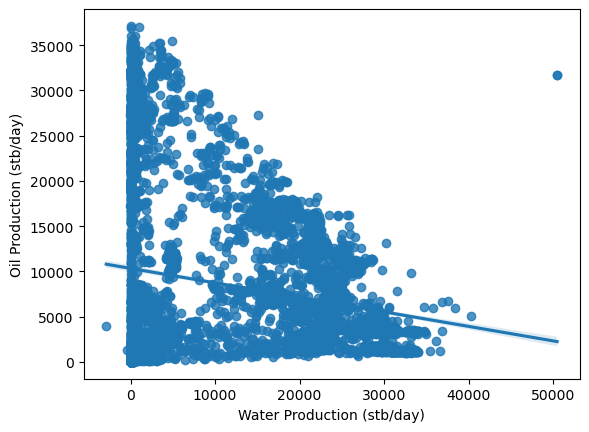

In [36]:
sns.regplot(x= prod['Water Production (stb/day)'], y = prod['Oil Production (stb/day)'])
plt.show()

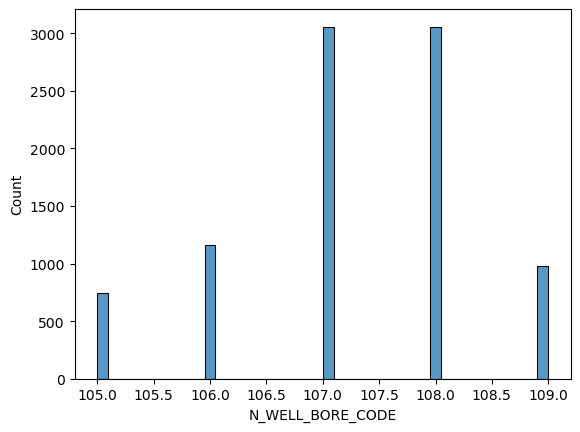

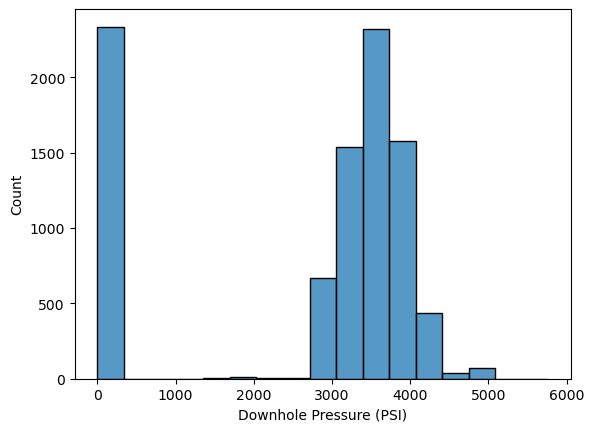

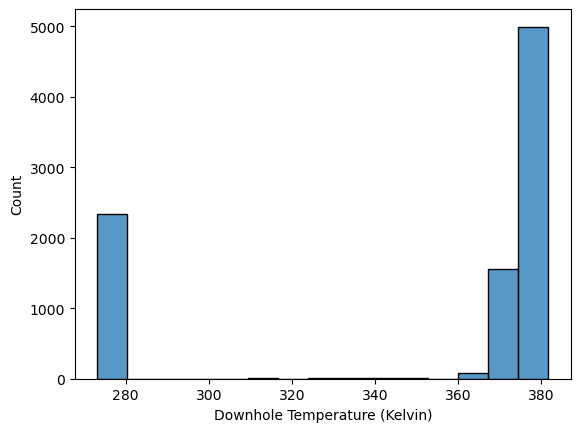

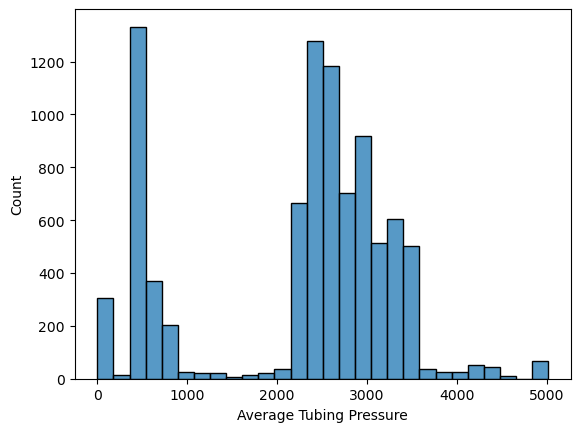

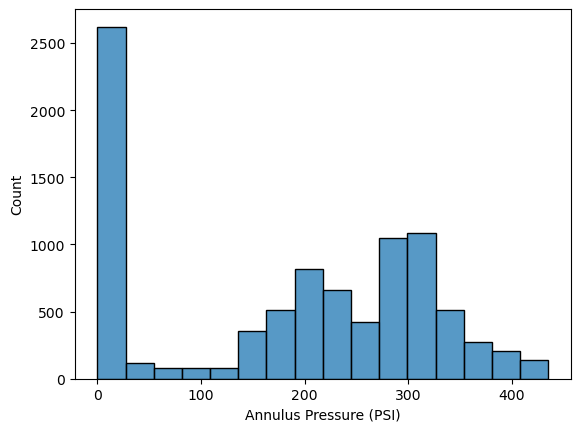

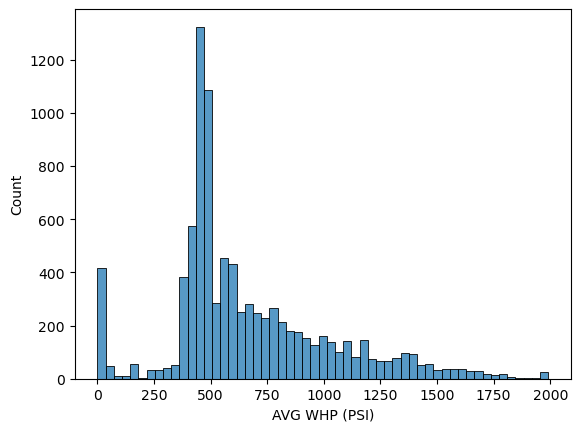

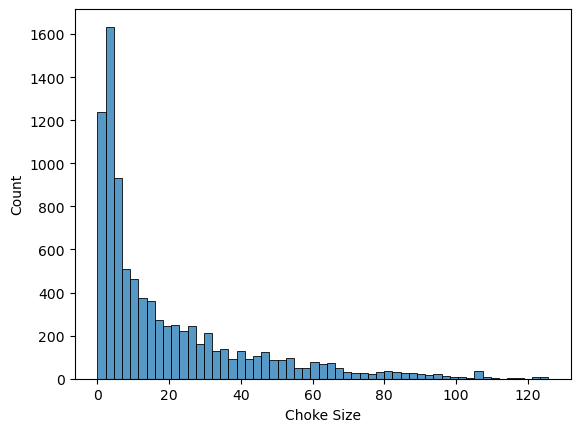

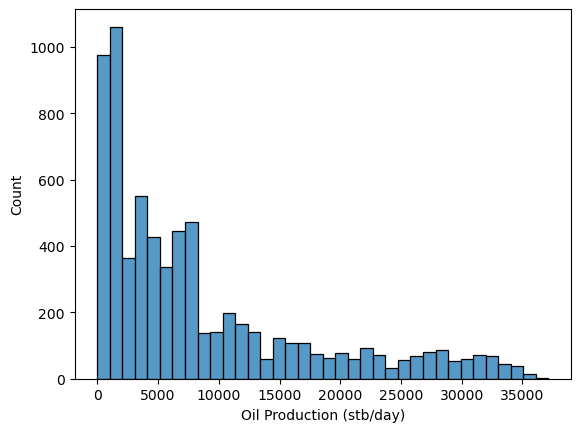

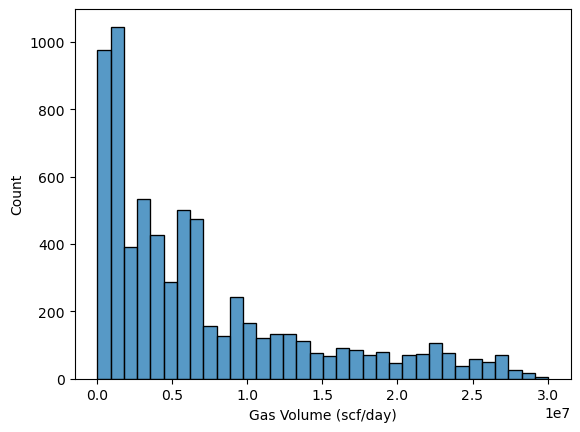

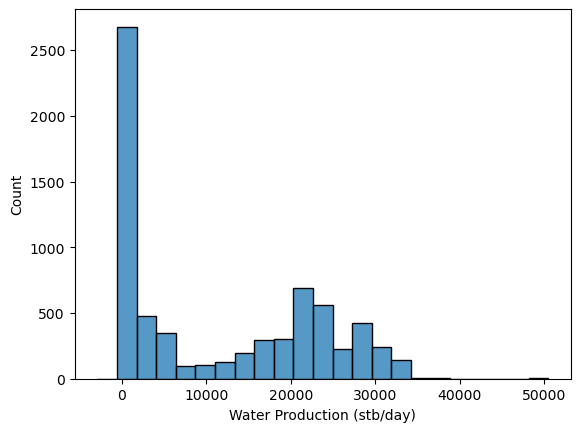

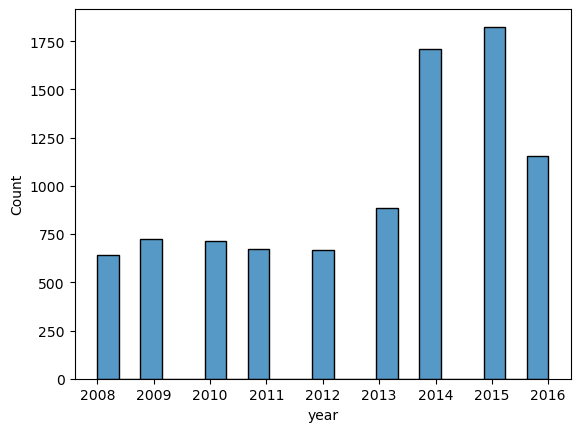

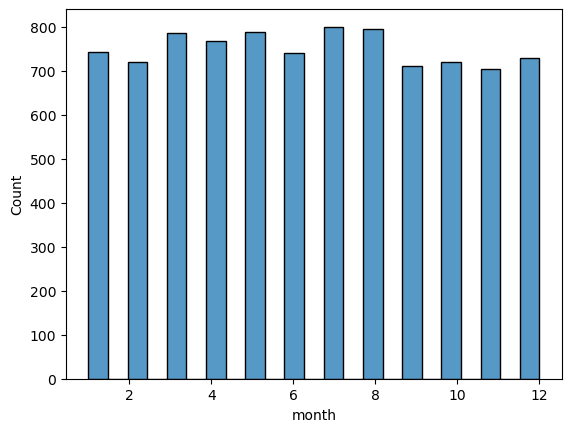

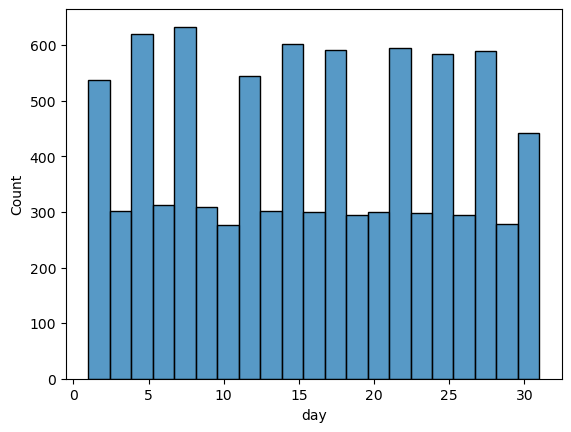

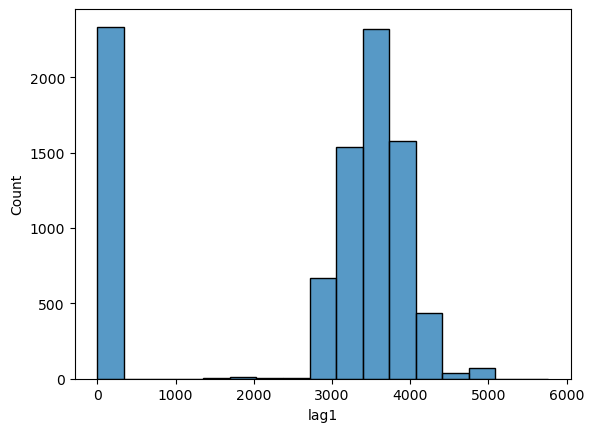

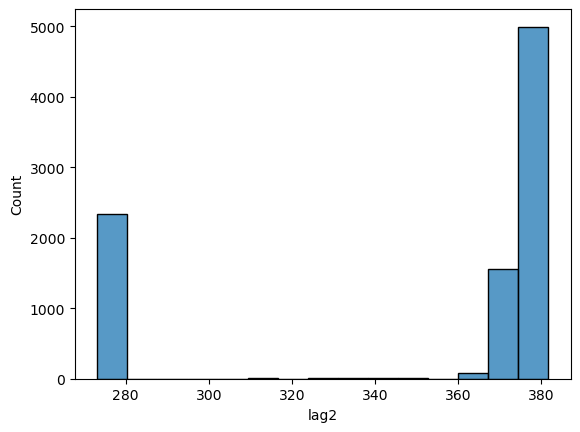

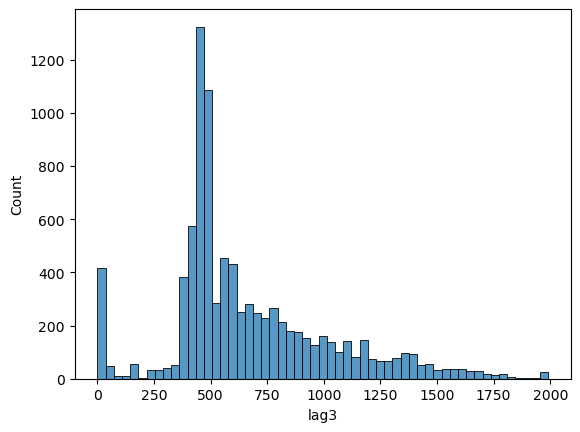

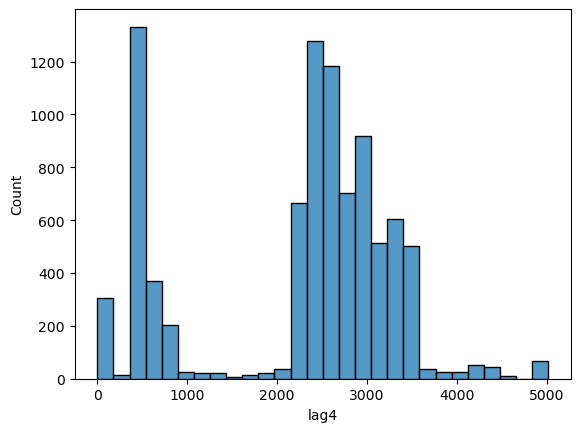

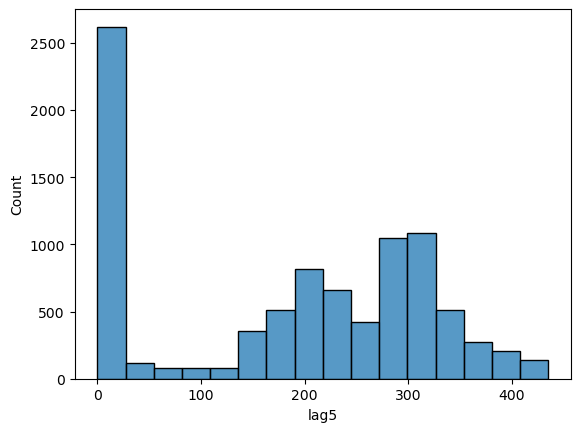

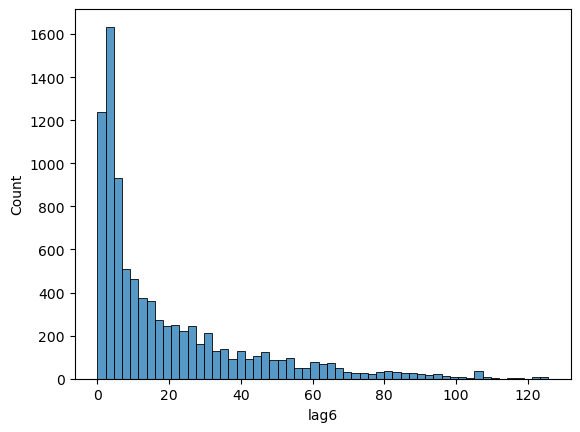

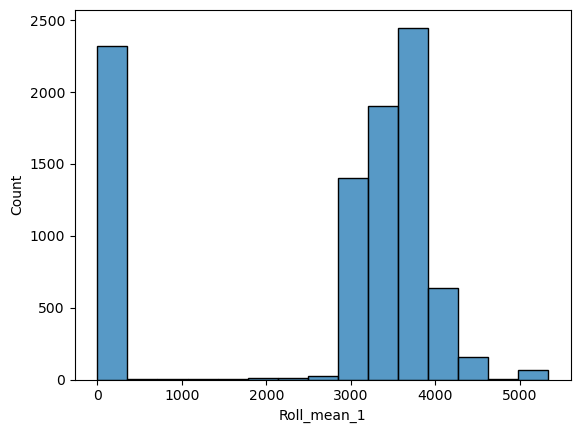

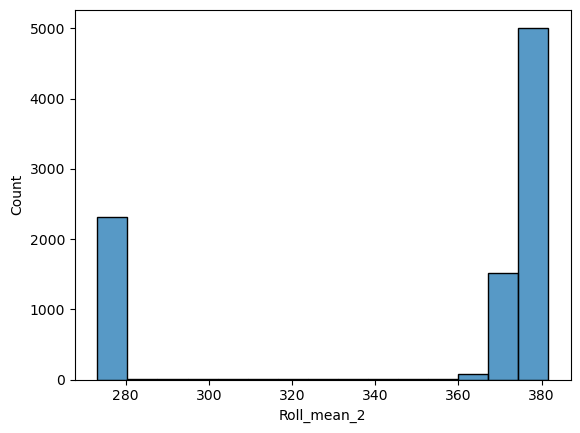

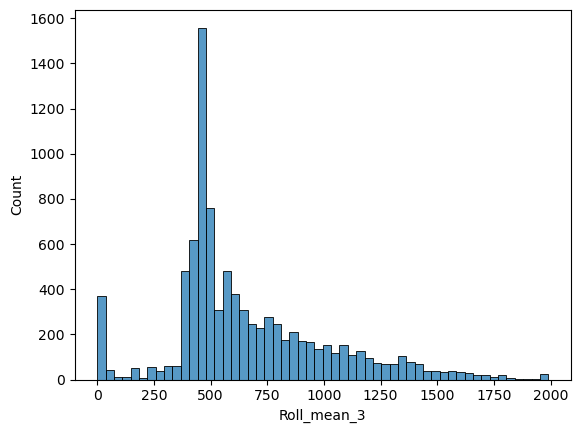

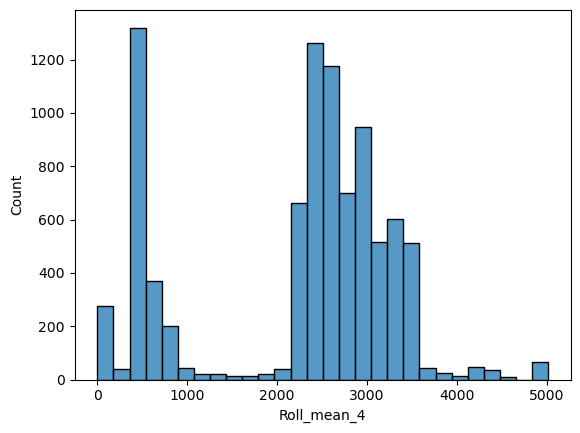

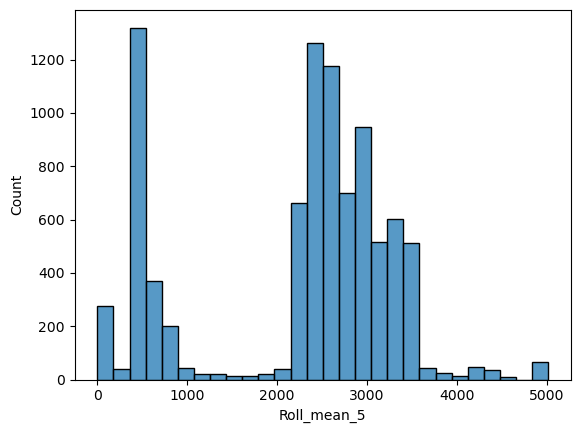

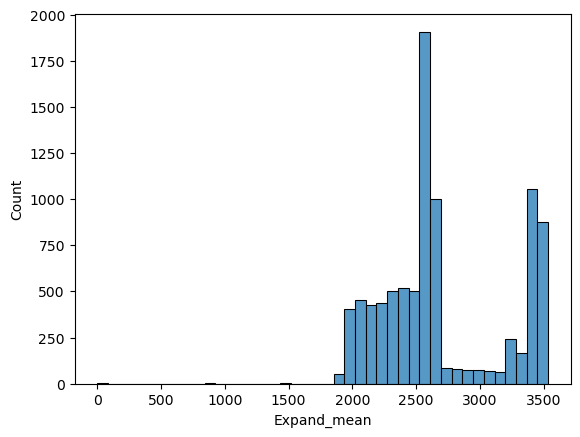

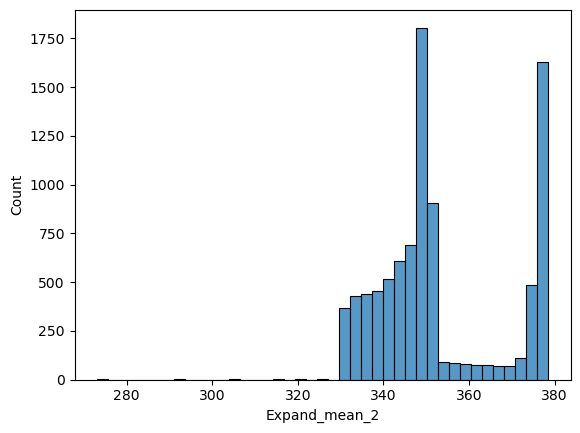

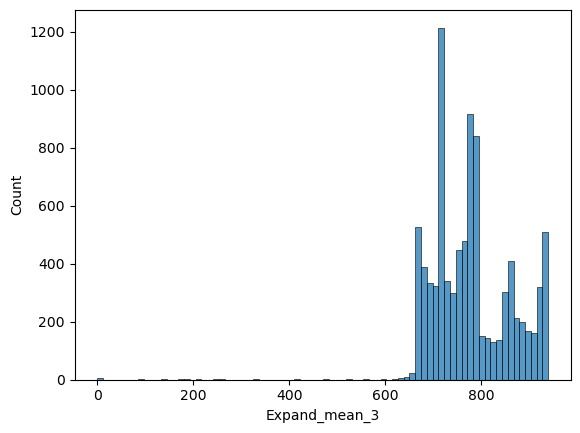

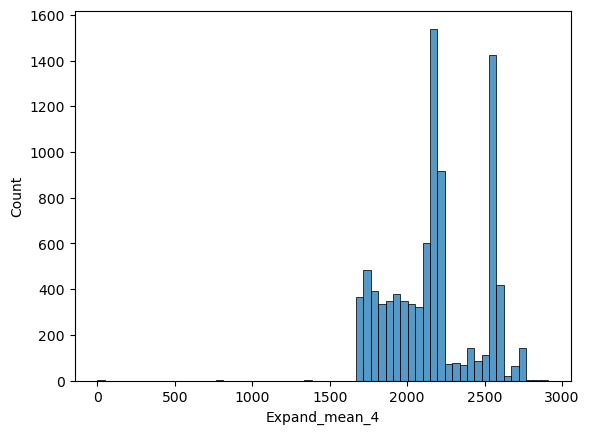

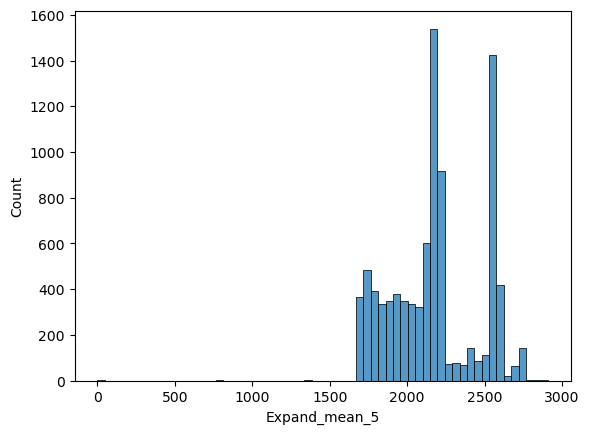

In [37]:
# Histogram for distribution

for i in prod.select_dtypes(include ='number').columns:
    sns.histplot(data = prod, x = i)
    plt.show()

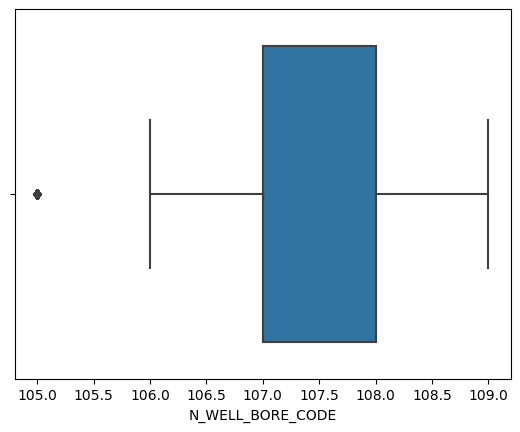

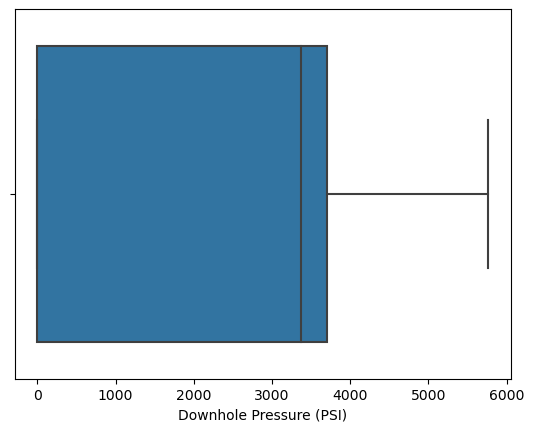

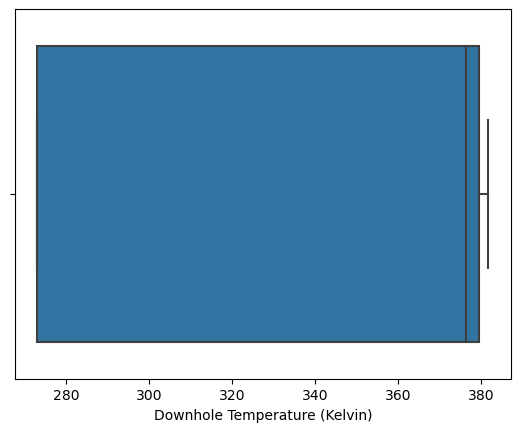

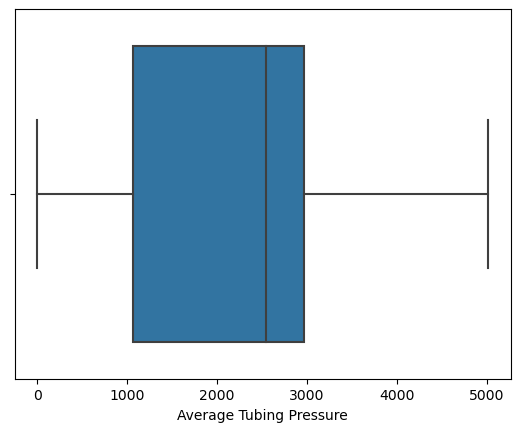

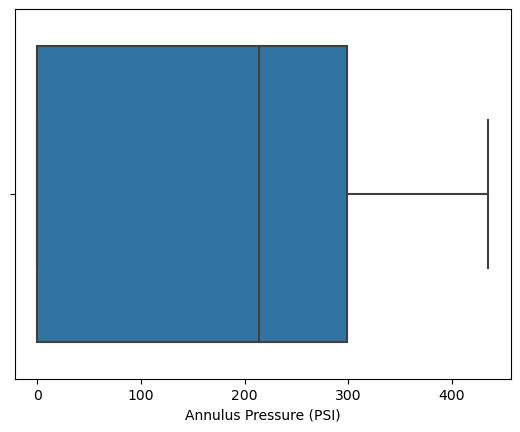

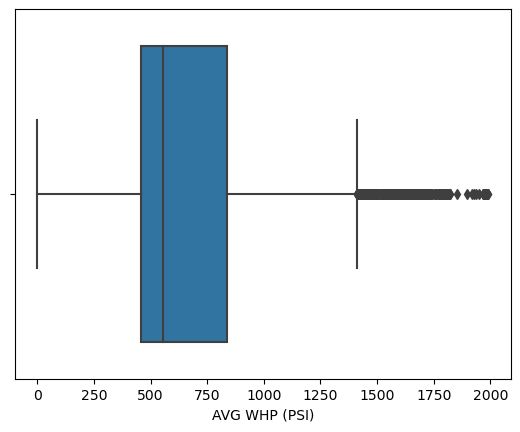

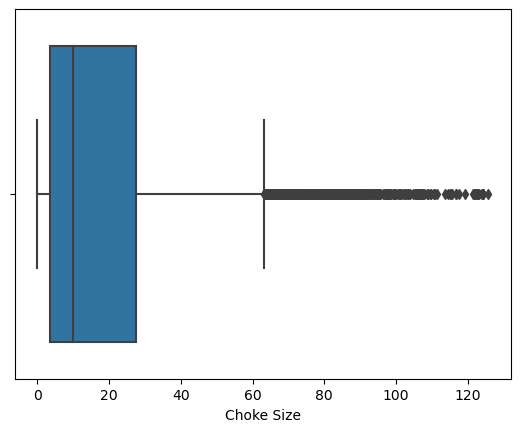

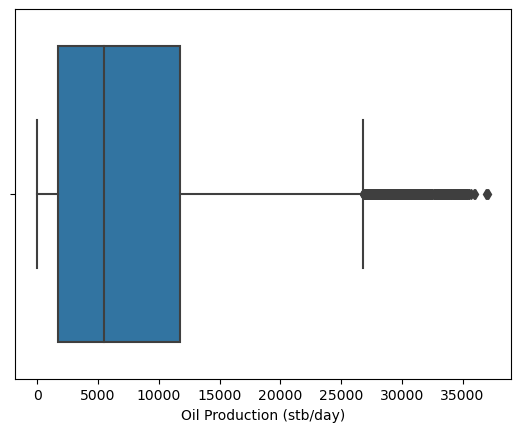

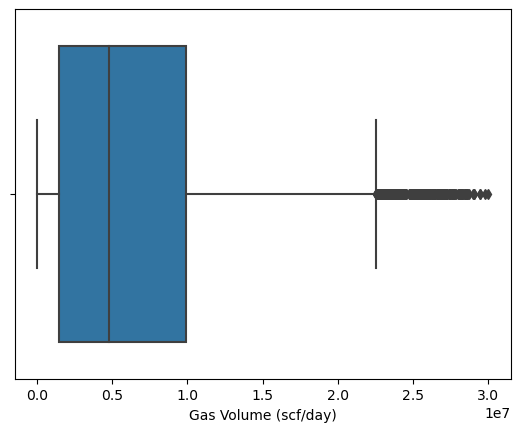

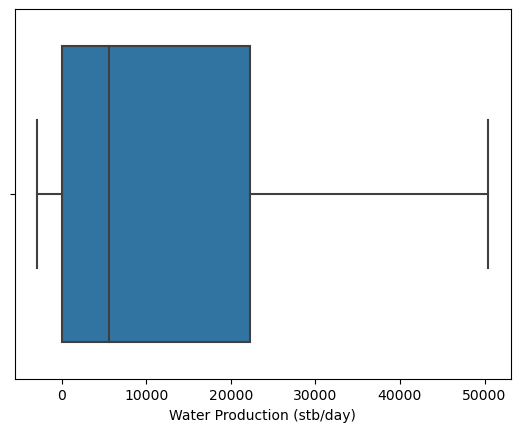

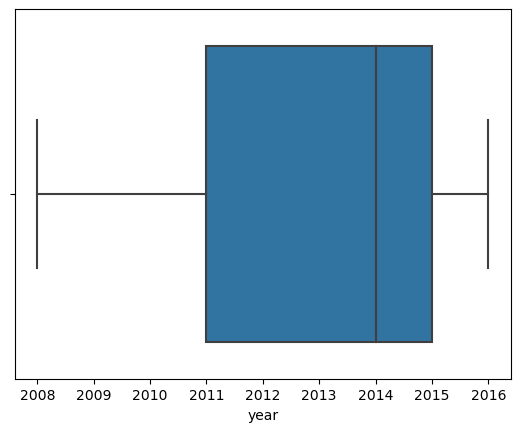

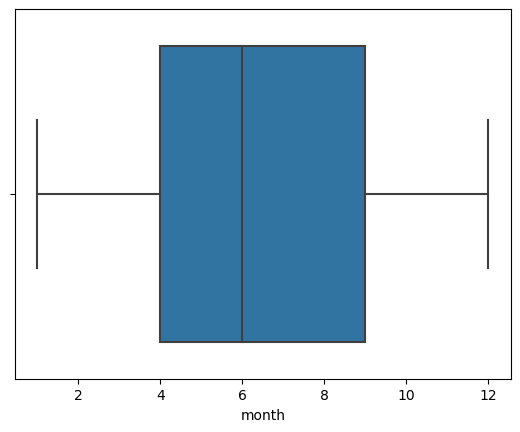

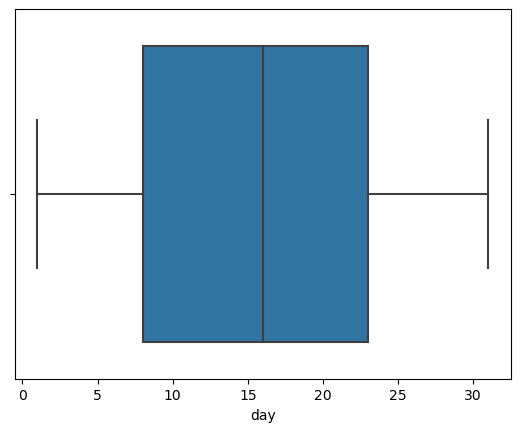

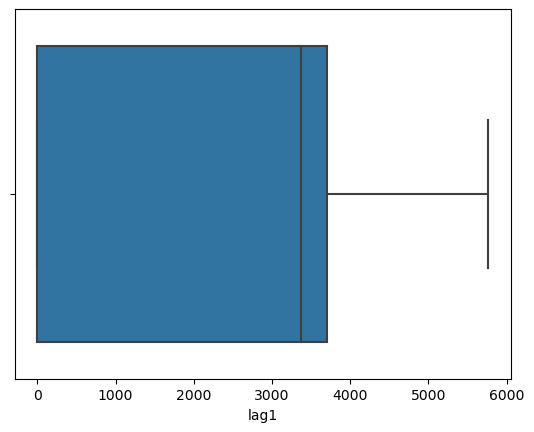

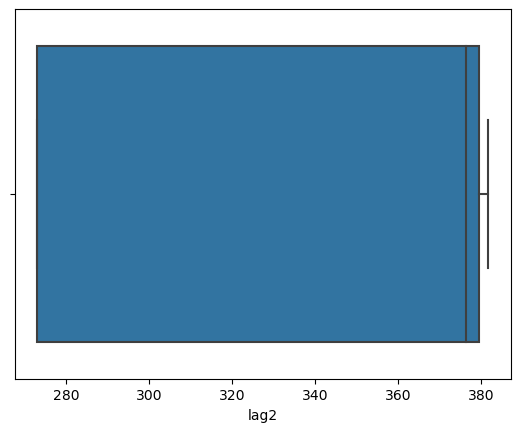

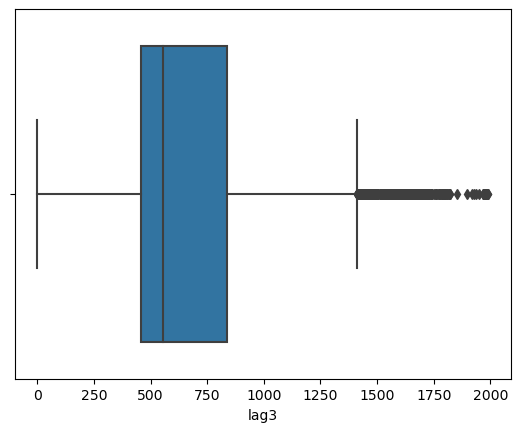

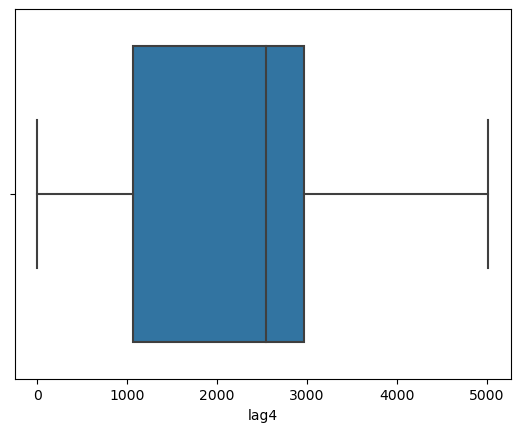

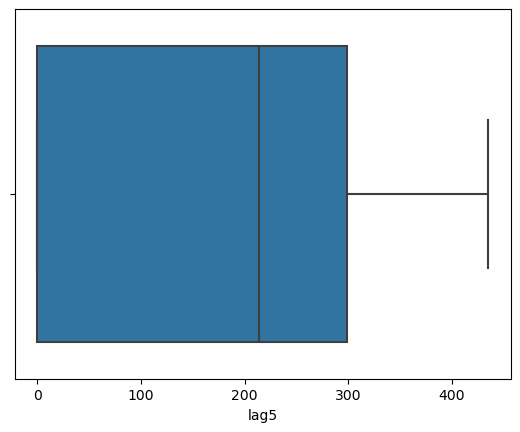

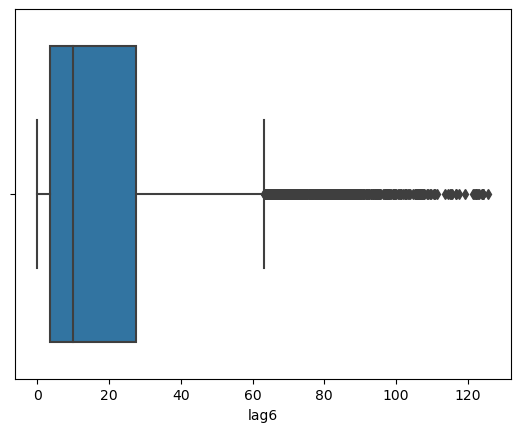

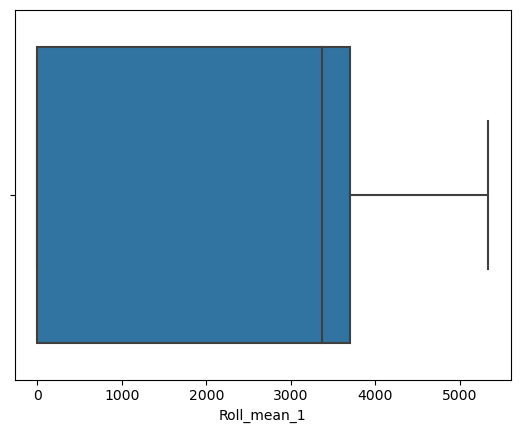

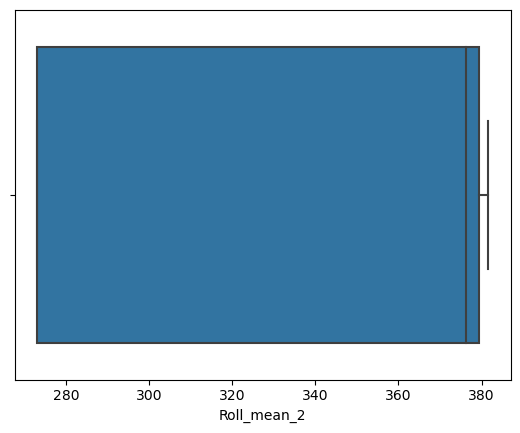

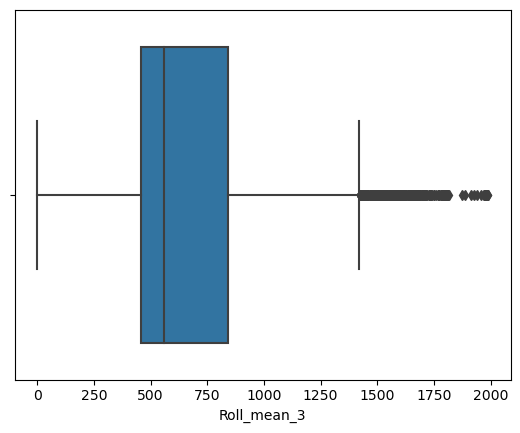

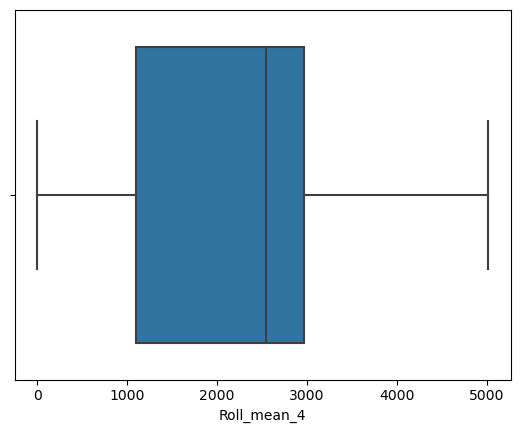

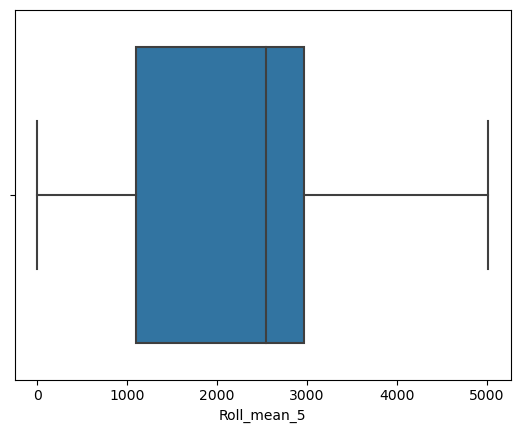

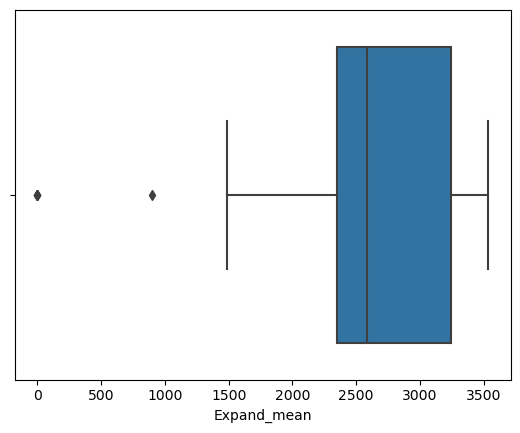

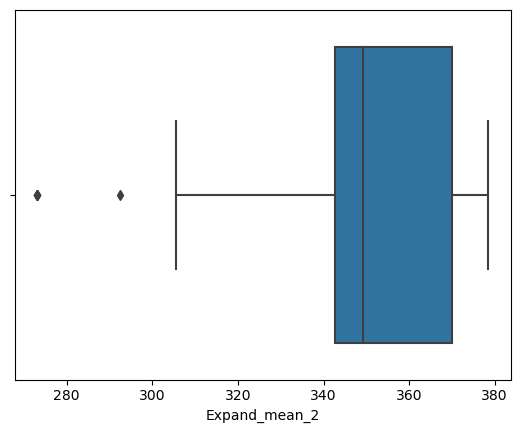

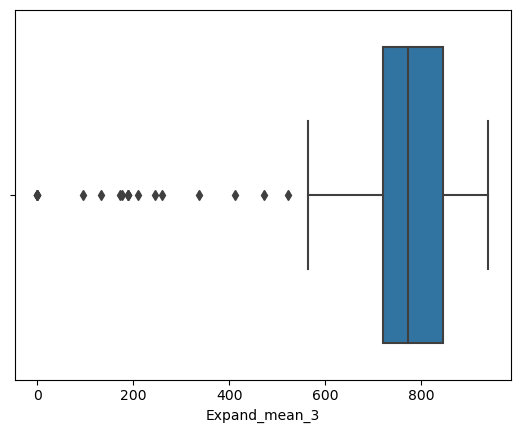

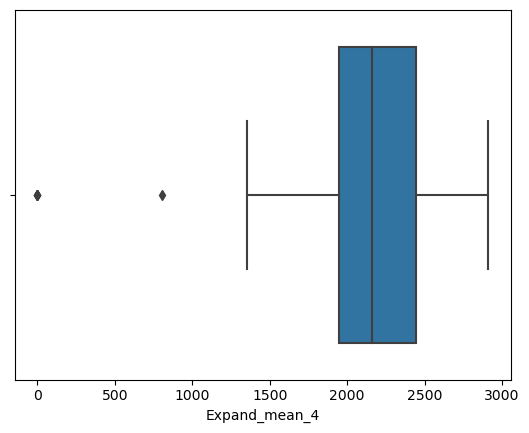

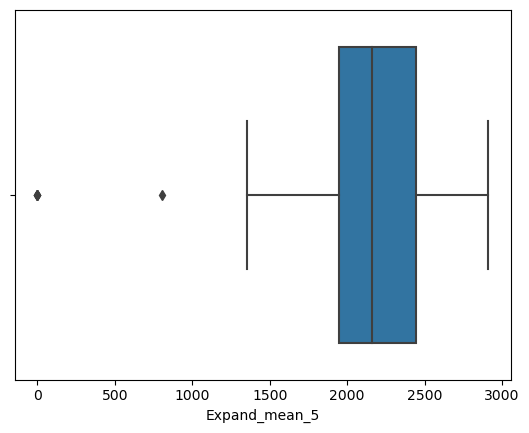

In [38]:
# Boxplot to show outliers

for i in prod.select_dtypes(include ='number').columns:
    sns.boxplot(data = prod, x = i)
    plt.show()

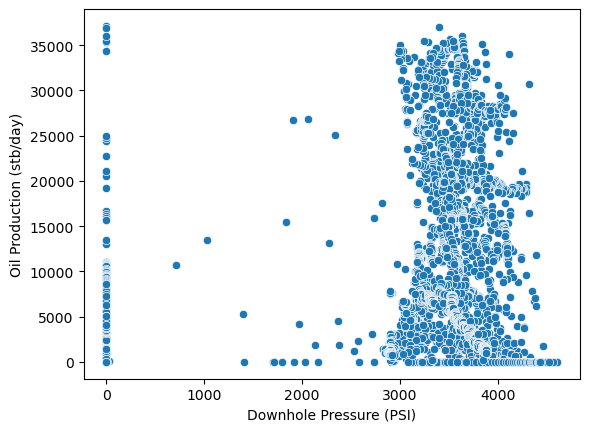

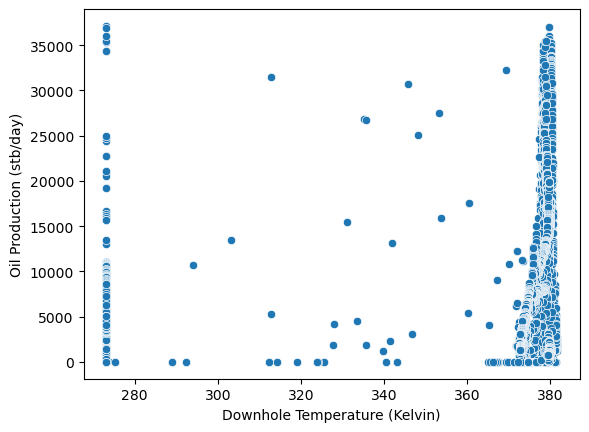

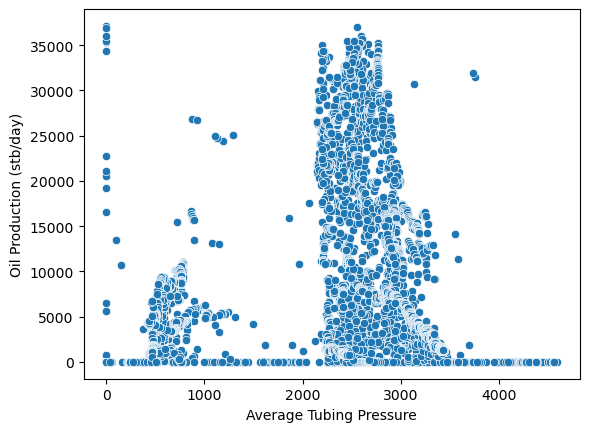

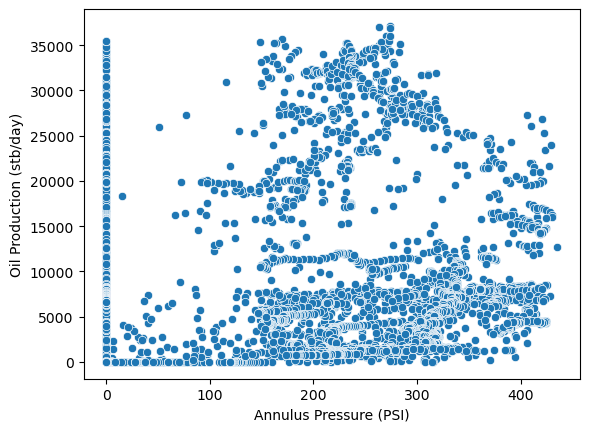

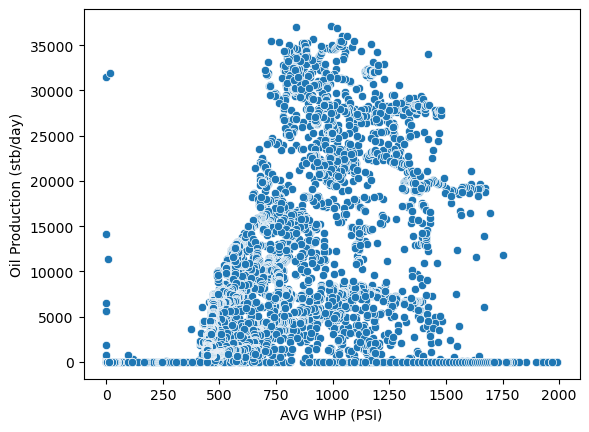

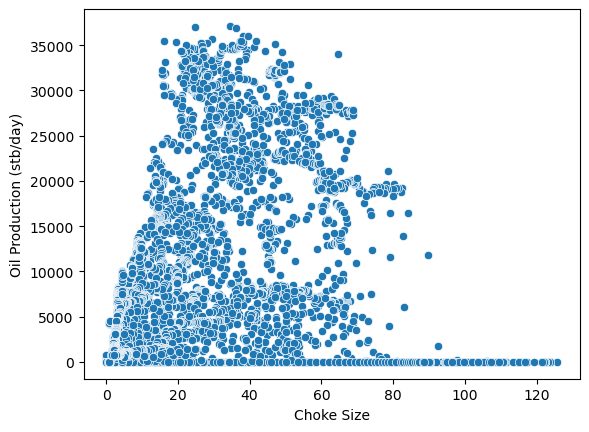

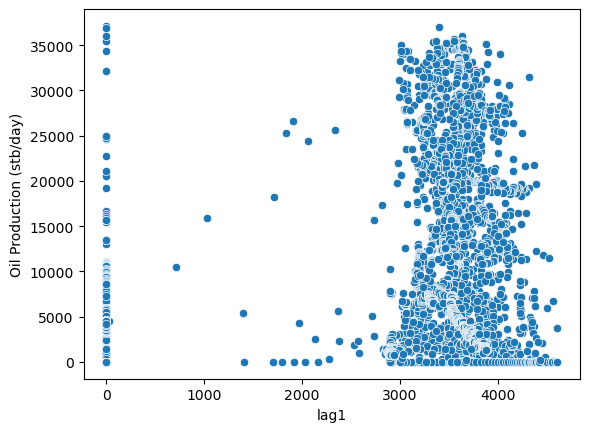

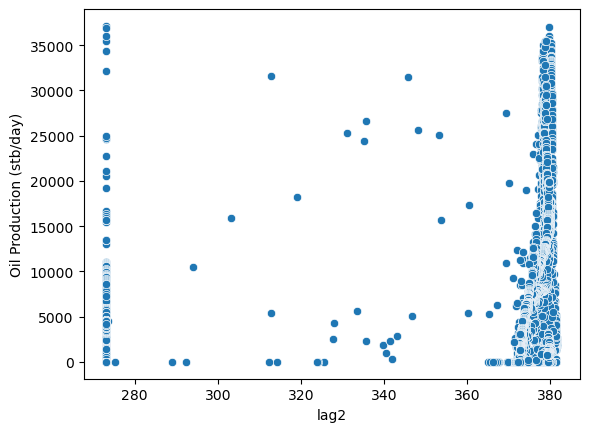

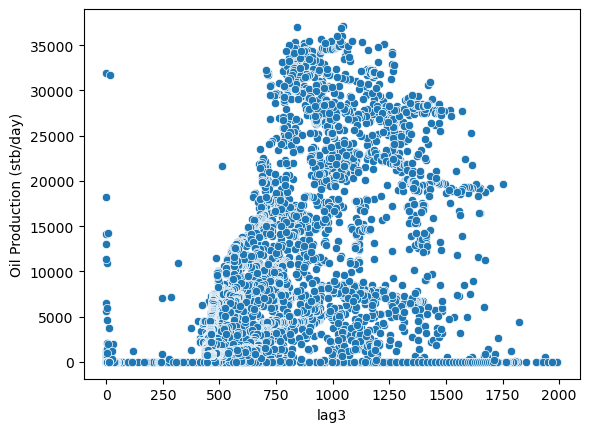

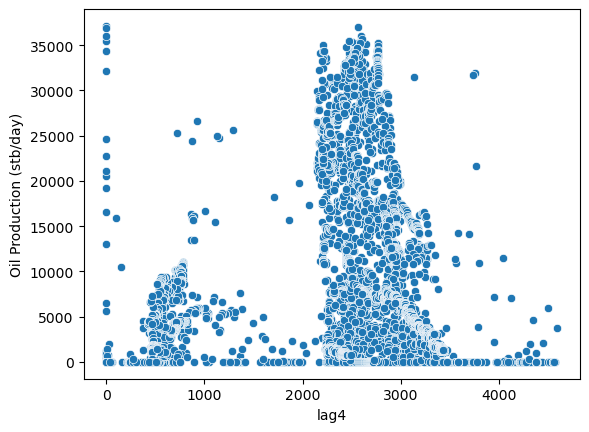

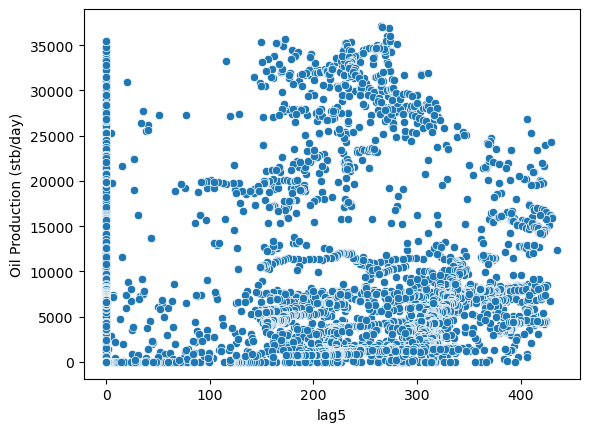

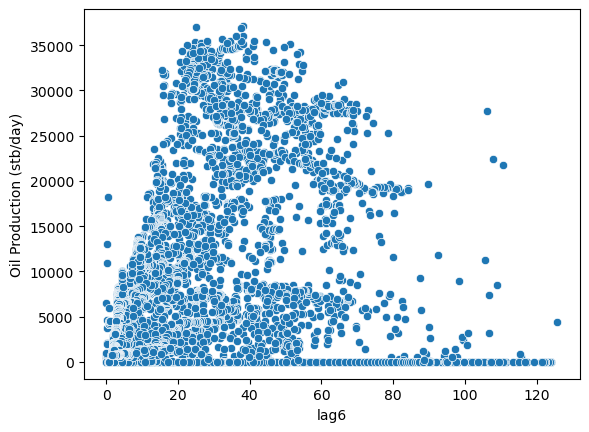

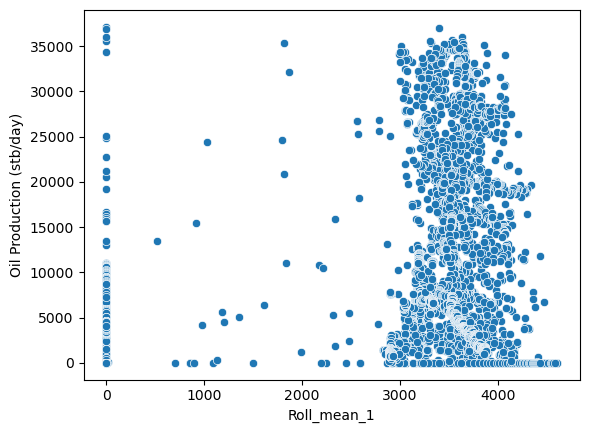

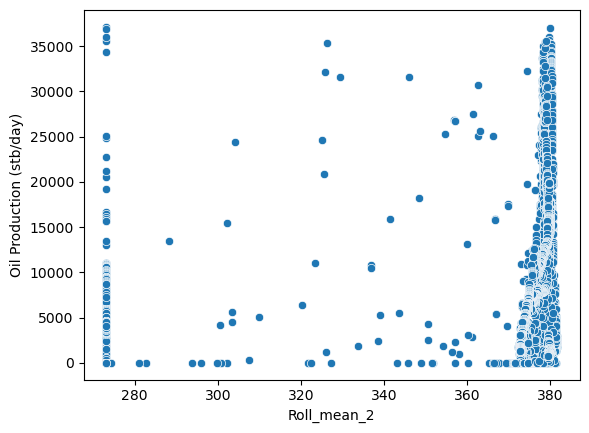

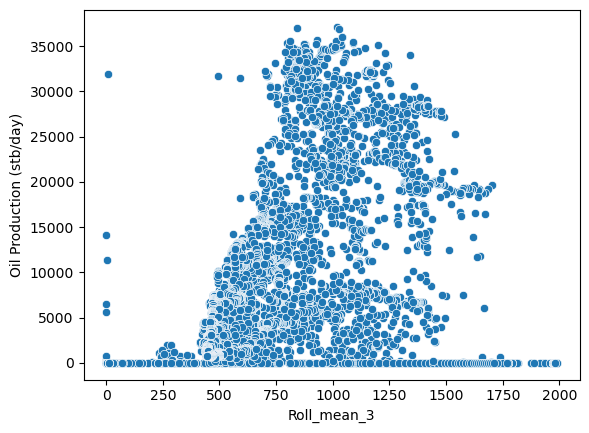

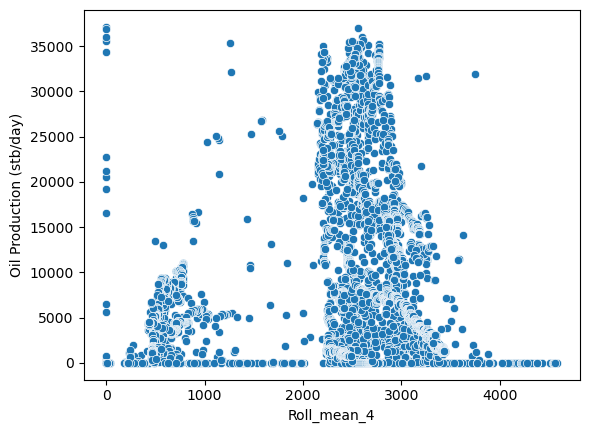

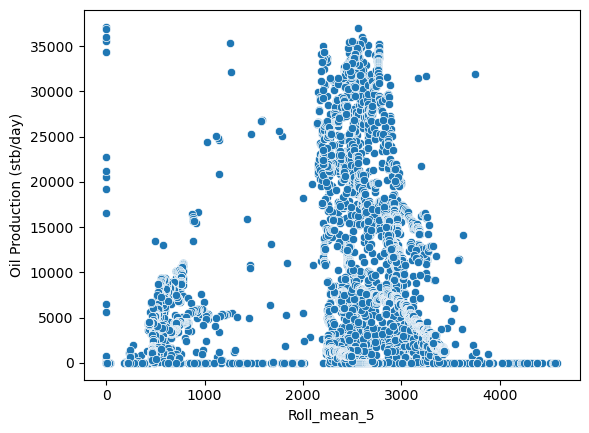

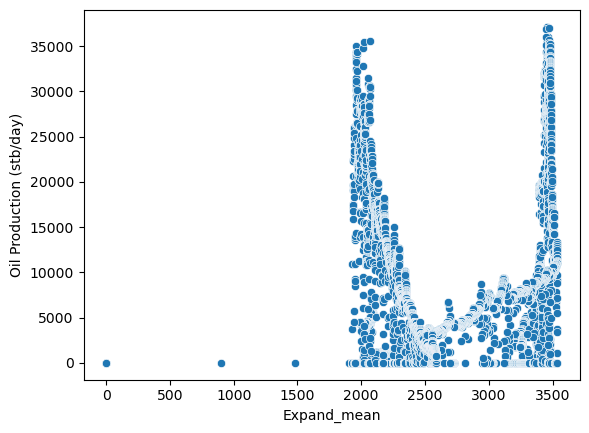

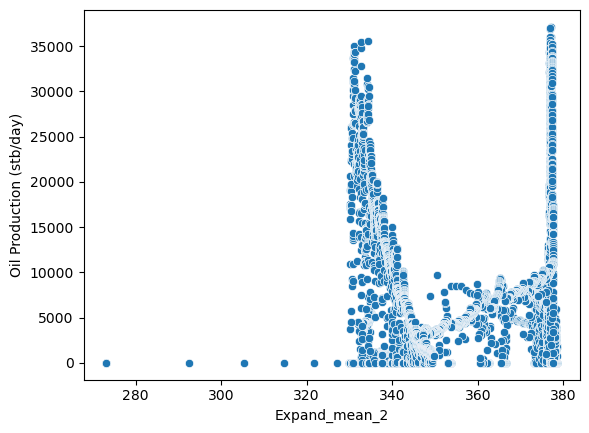

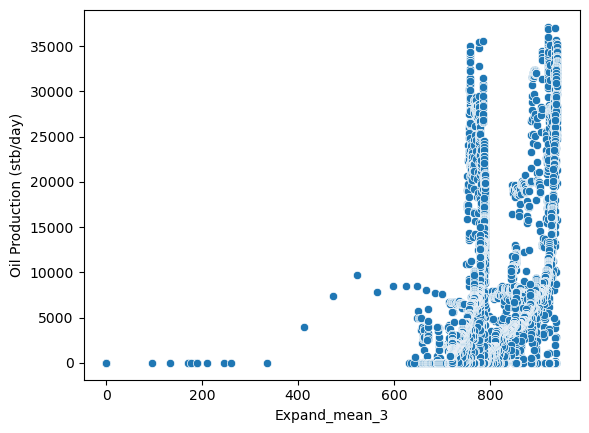

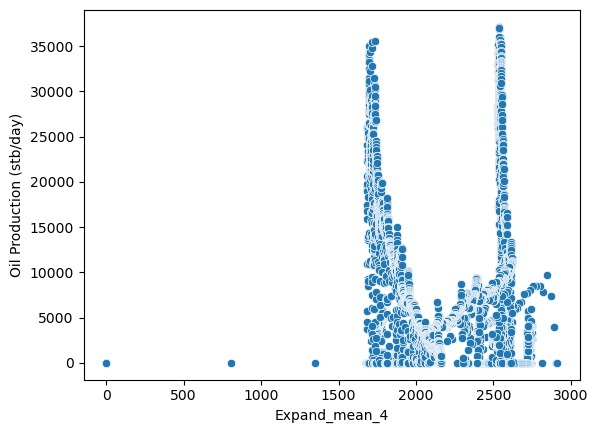

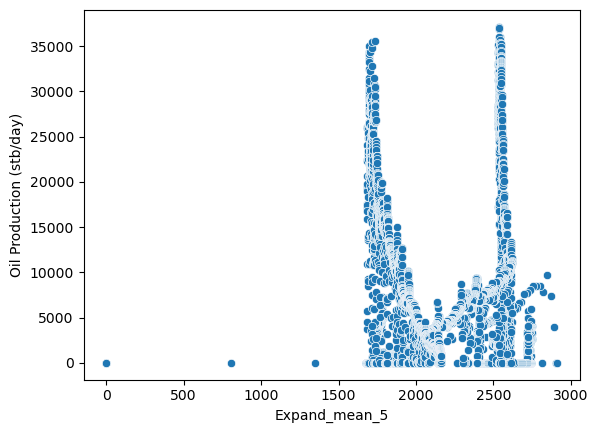

In [39]:
# Scatterplot for oil production to find the relationship with other

for i in ['Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size','lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6', 'Roll_mean_1', 'Roll_mean_2',
       'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5', 'Expand_mean',
       'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4', 'Expand_mean_5']:
    sns.scatterplot(data = prod, x= i, y ='Oil Production (stb/day)')
    plt.show()

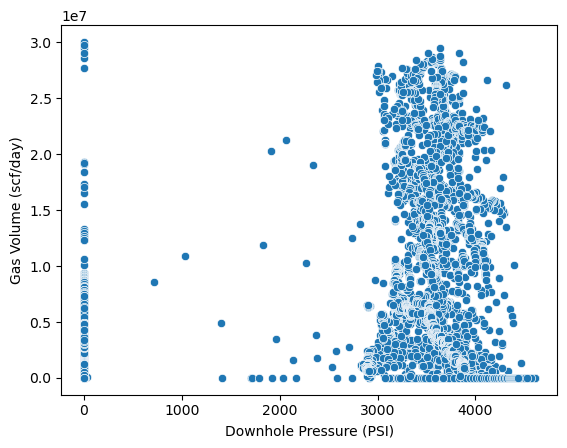

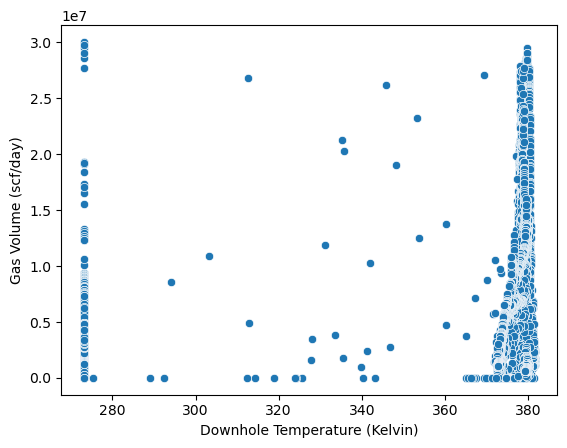

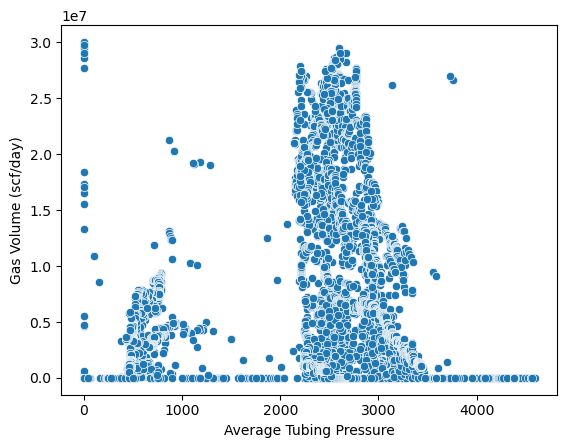

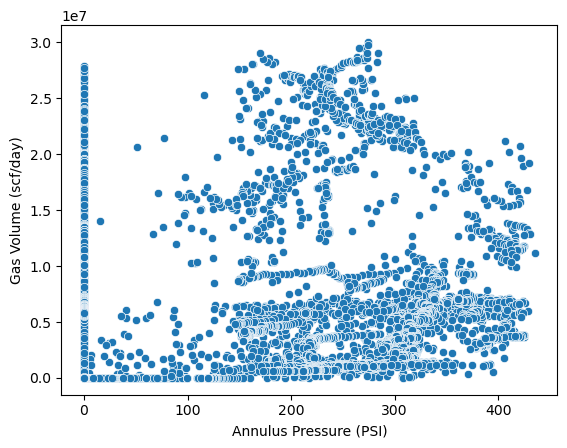

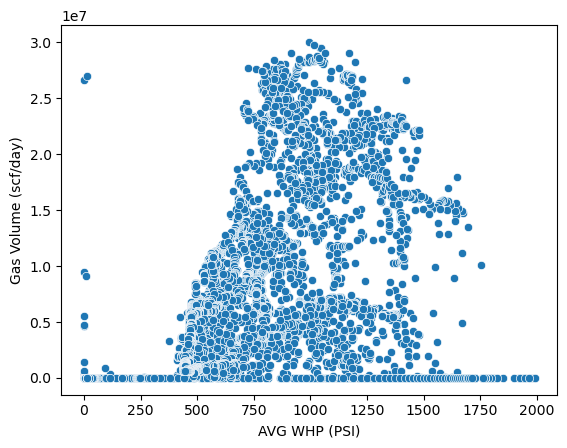

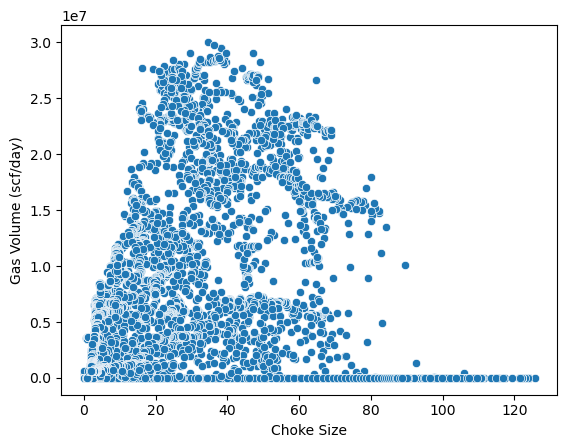

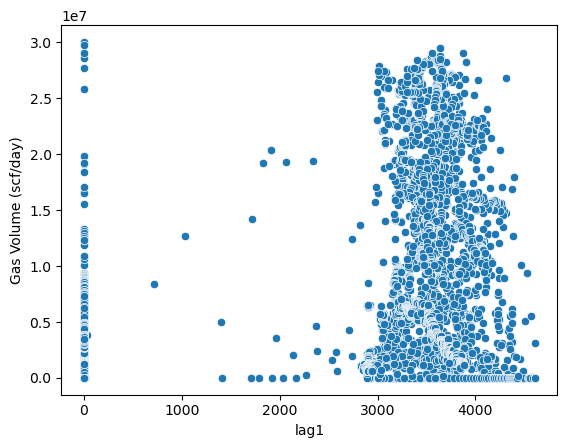

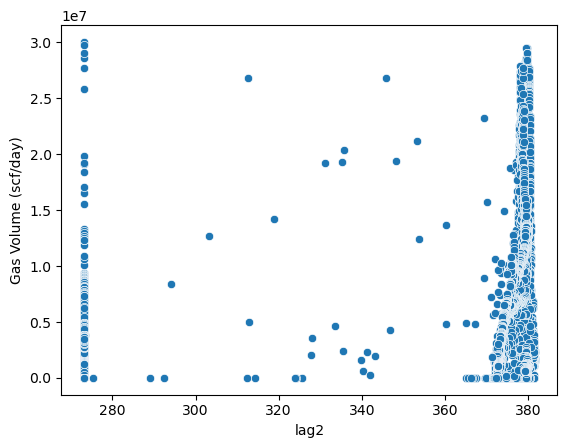

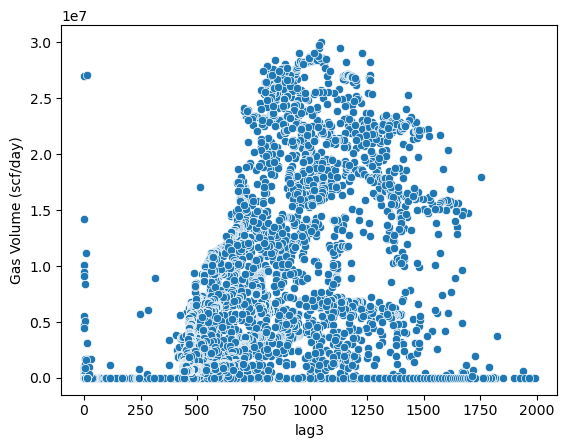

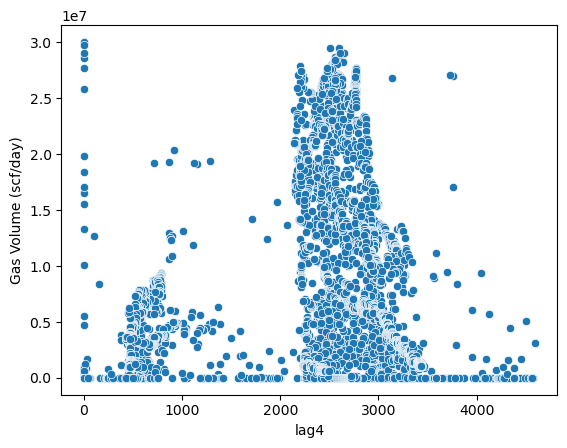

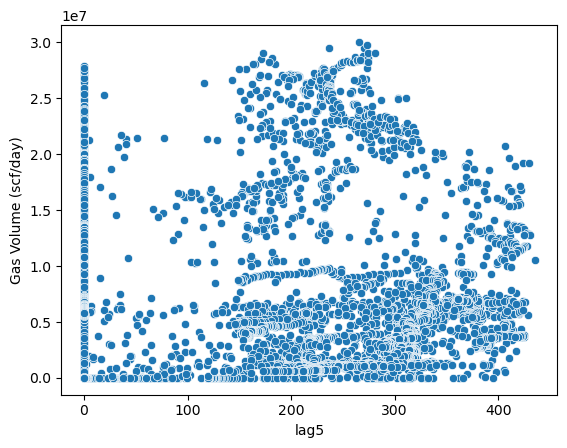

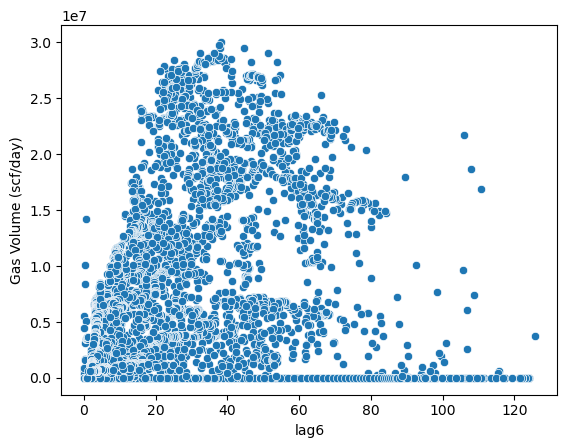

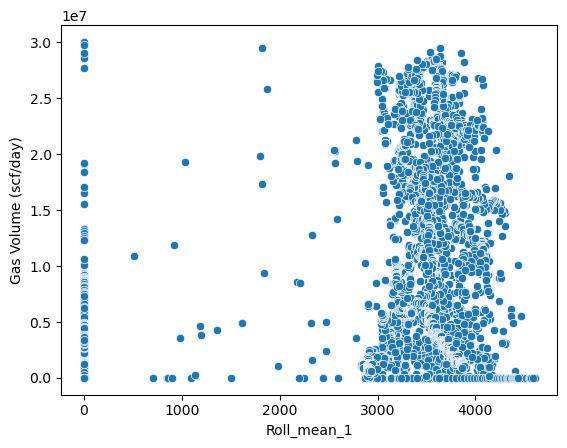

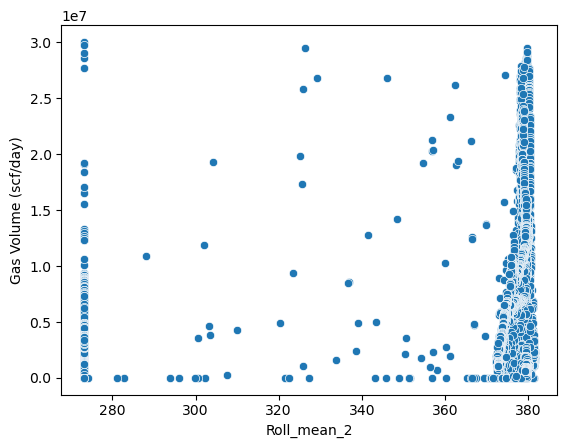

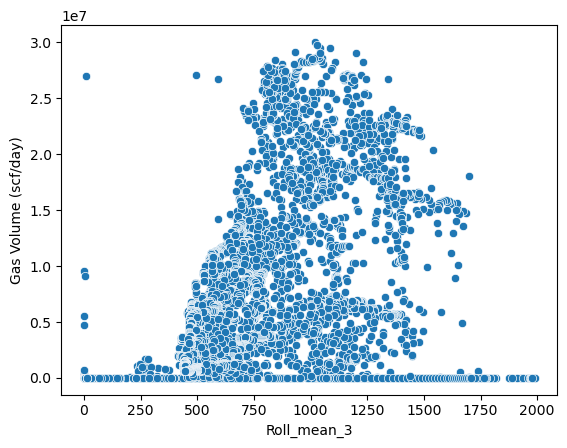

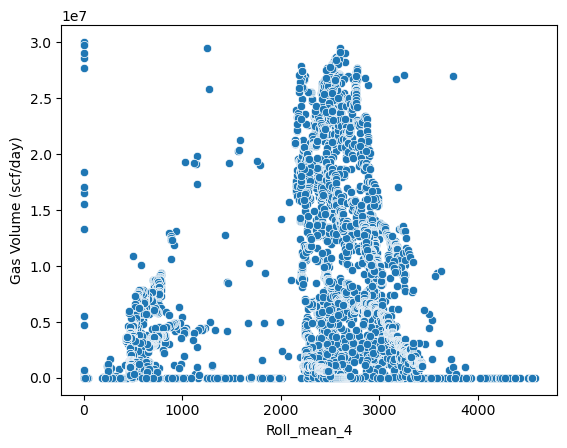

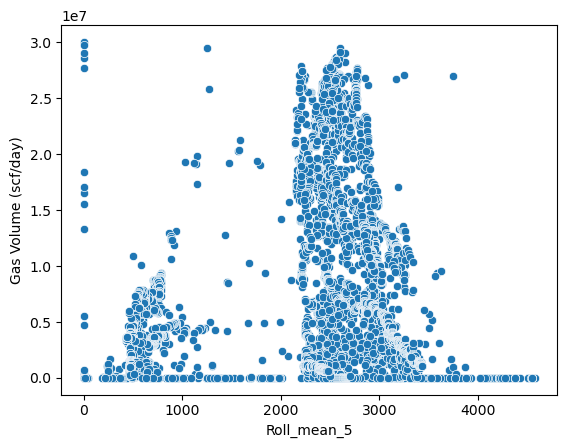

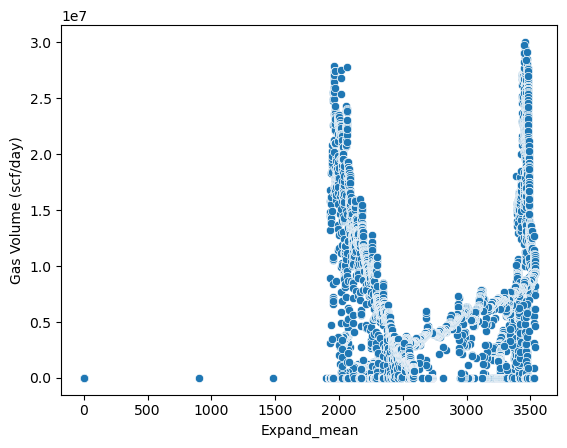

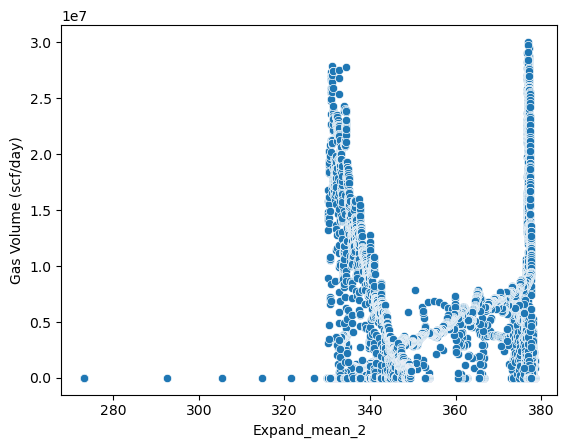

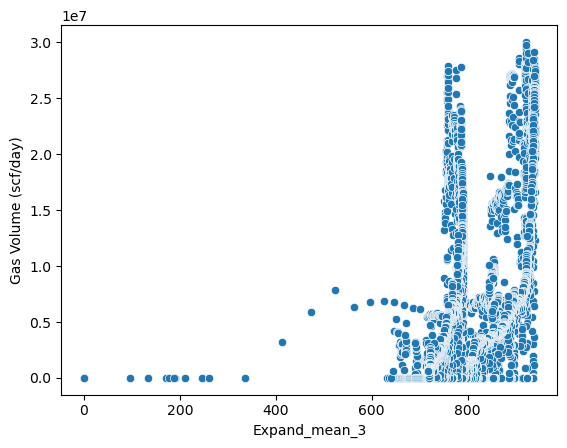

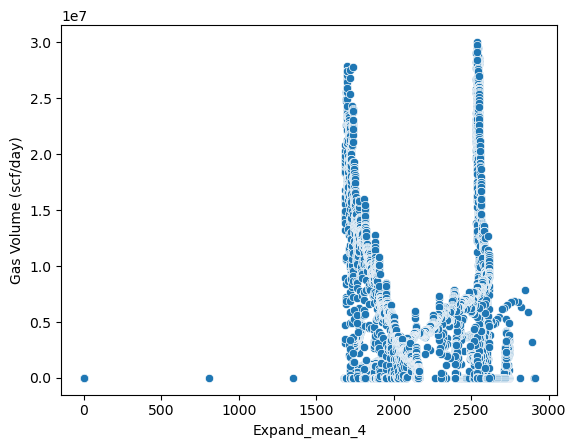

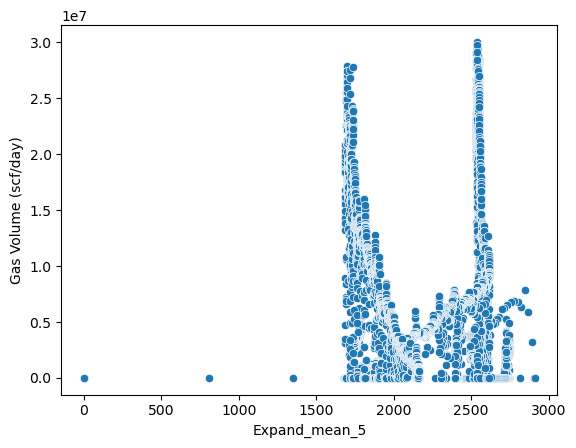

In [40]:
# Scatterplot for oil production to find the relationship with other

for i in ['Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size','lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6', 'Roll_mean_1', 'Roll_mean_2',
       'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5', 'Expand_mean',
       'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4', 'Expand_mean_5']:
    sns.scatterplot(data = prod, x= i, y ='Gas Volume (scf/day)')
    plt.show()

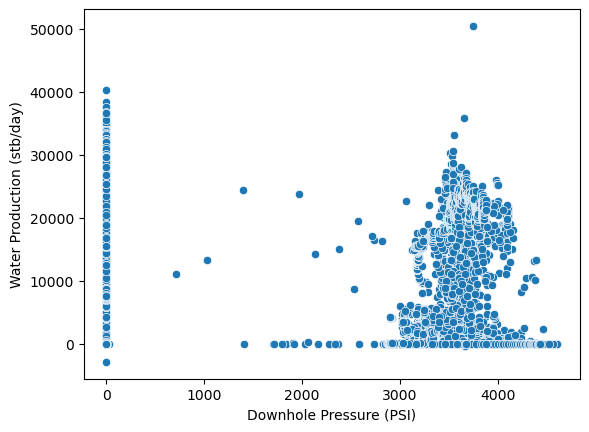

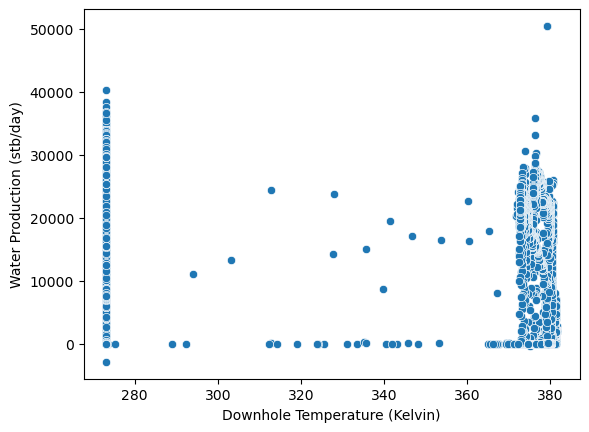

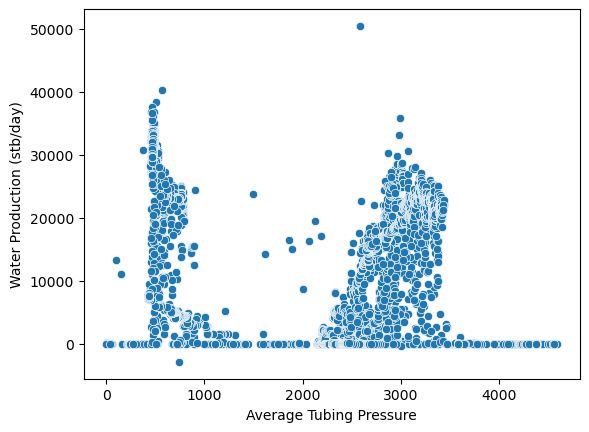

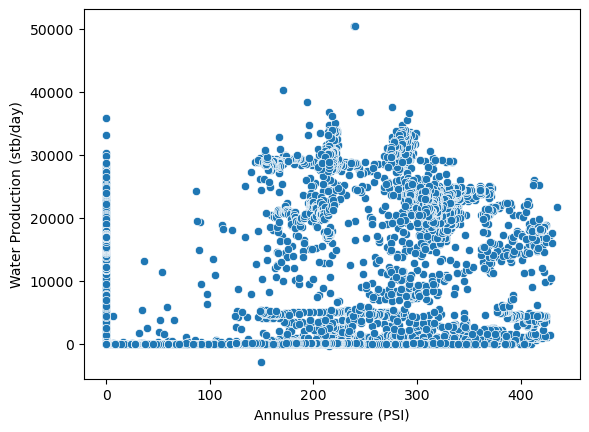

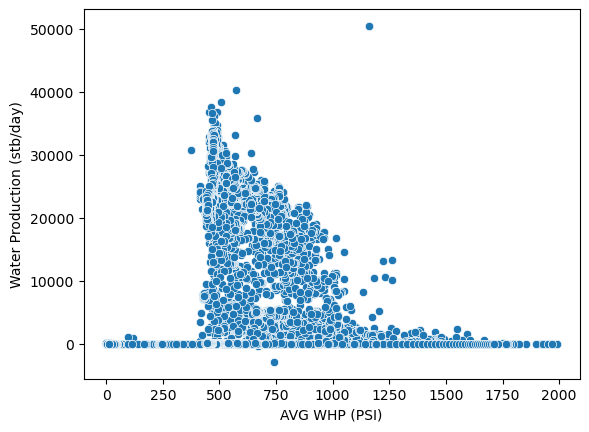

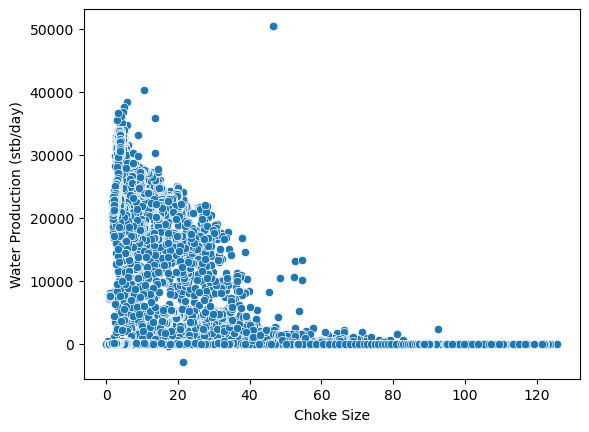

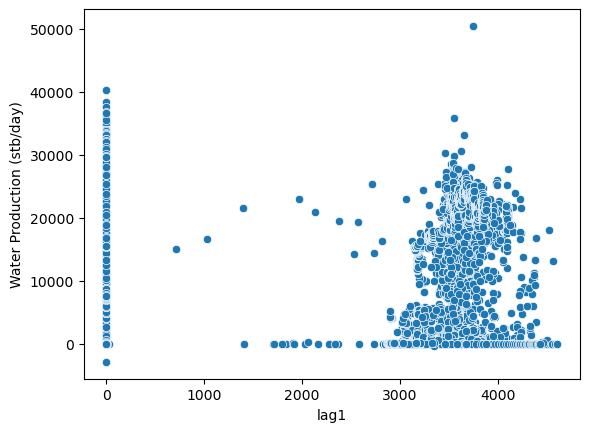

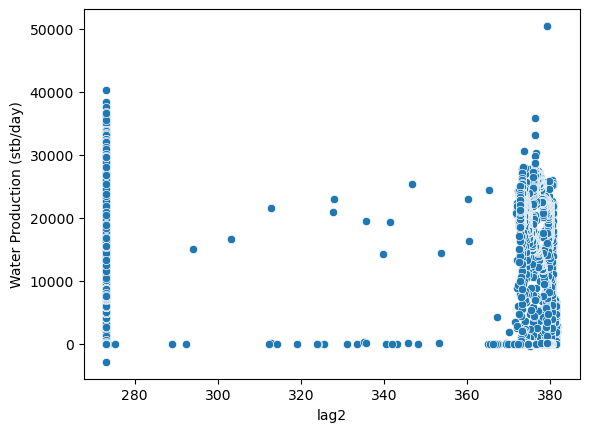

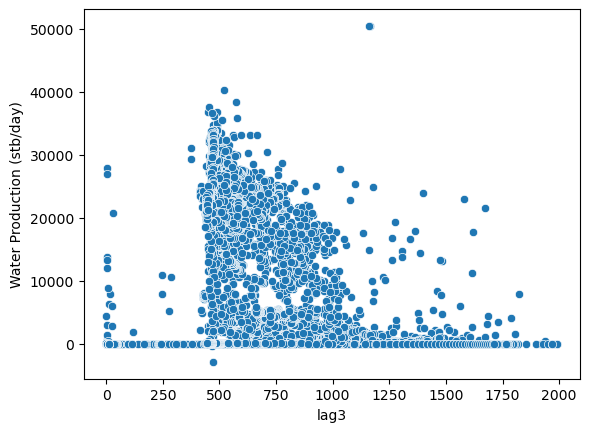

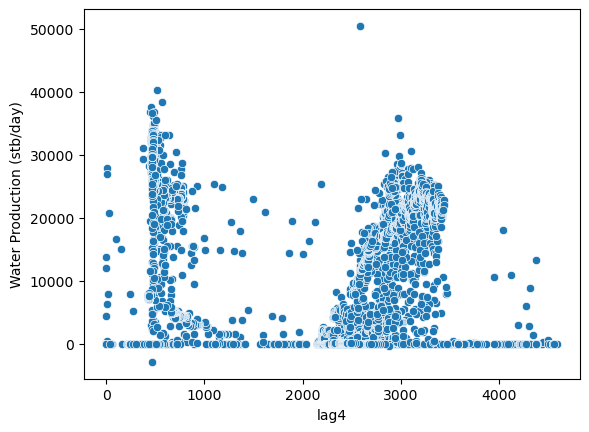

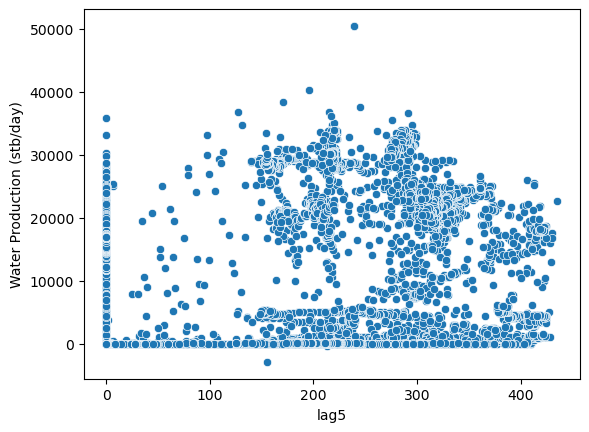

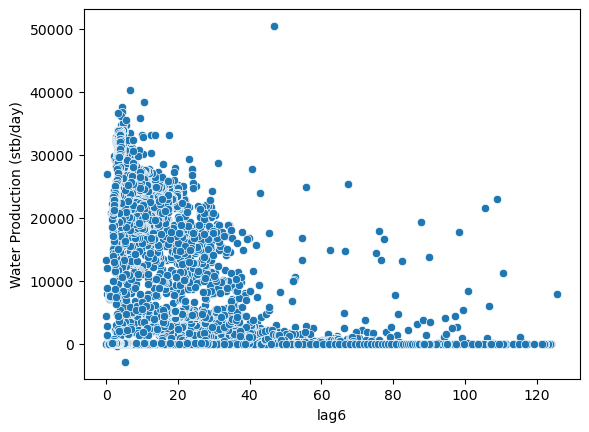

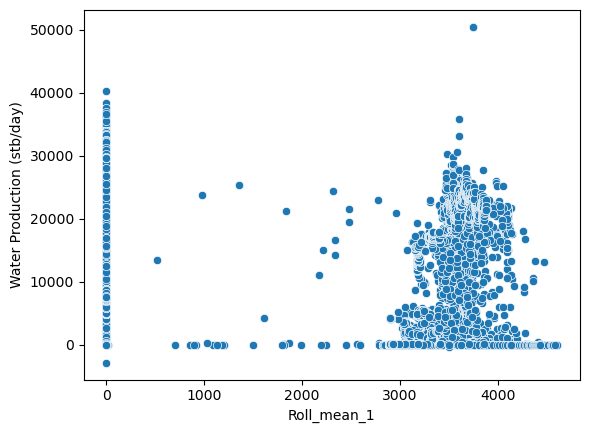

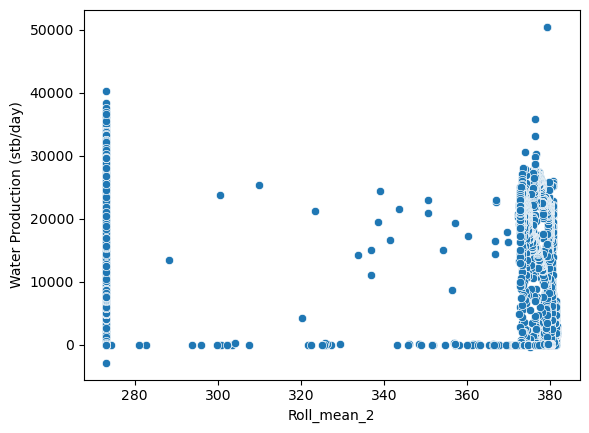

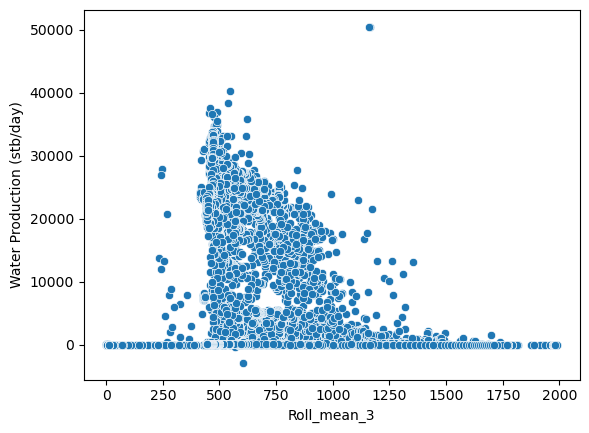

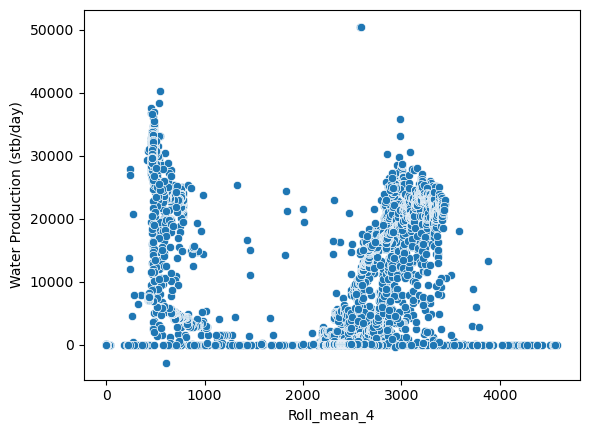

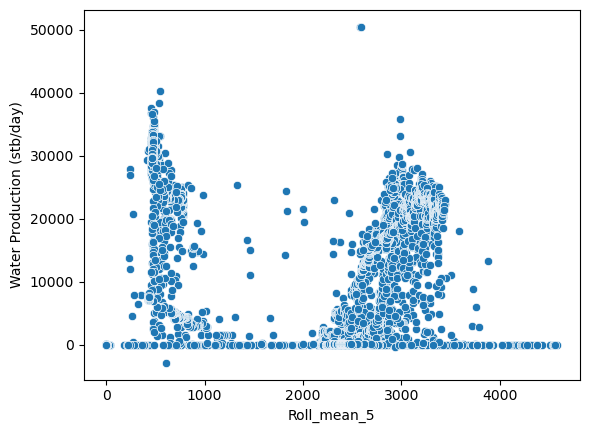

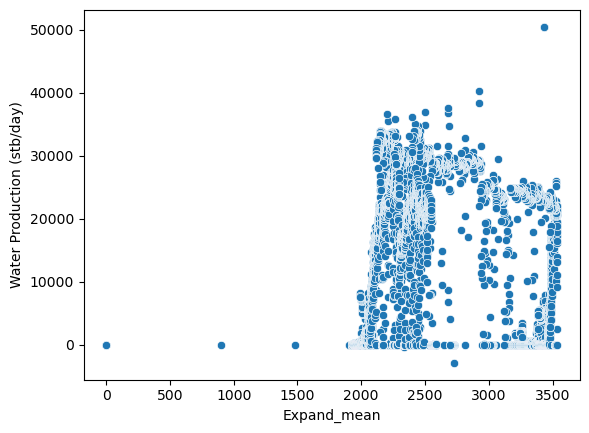

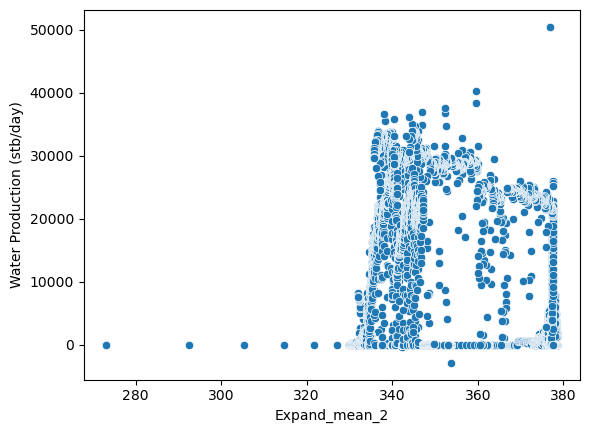

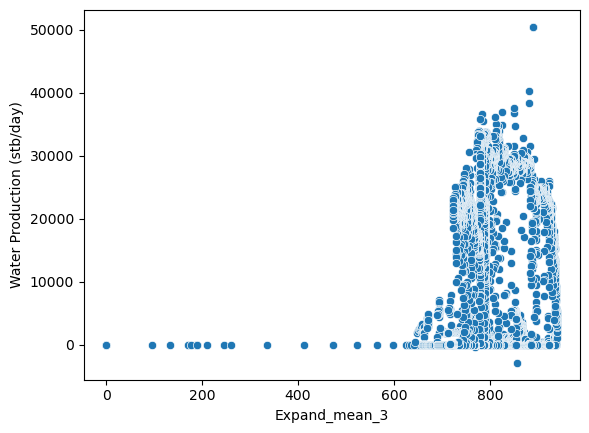

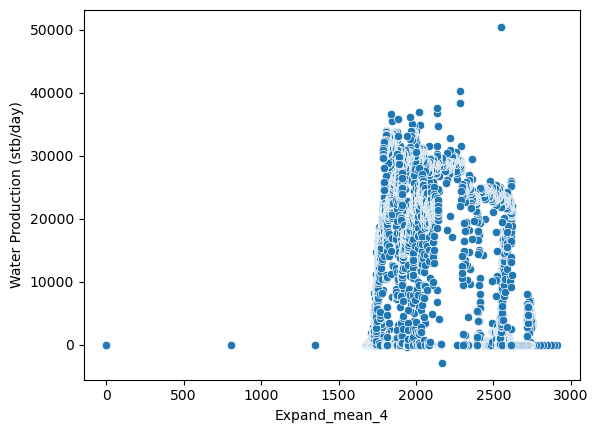

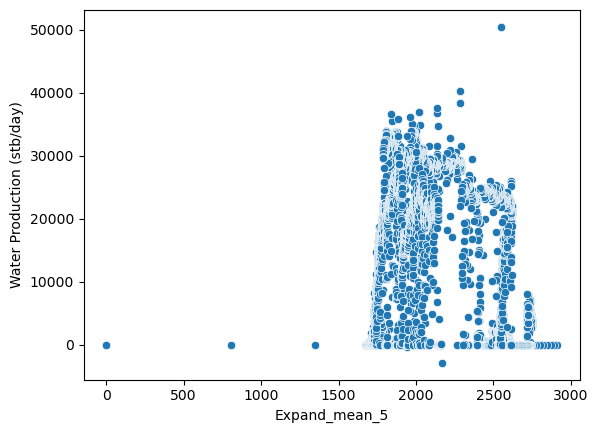

In [41]:
# Scatterplot for oil production to find the relationship with other

for i in ['Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size','lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6', 'Roll_mean_1', 'Roll_mean_2',
       'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5', 'Expand_mean',
       'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4', 'Expand_mean_5']:
    sns.scatterplot(data = prod, x= i, y ='Water Production (stb/day)')
    plt.show()

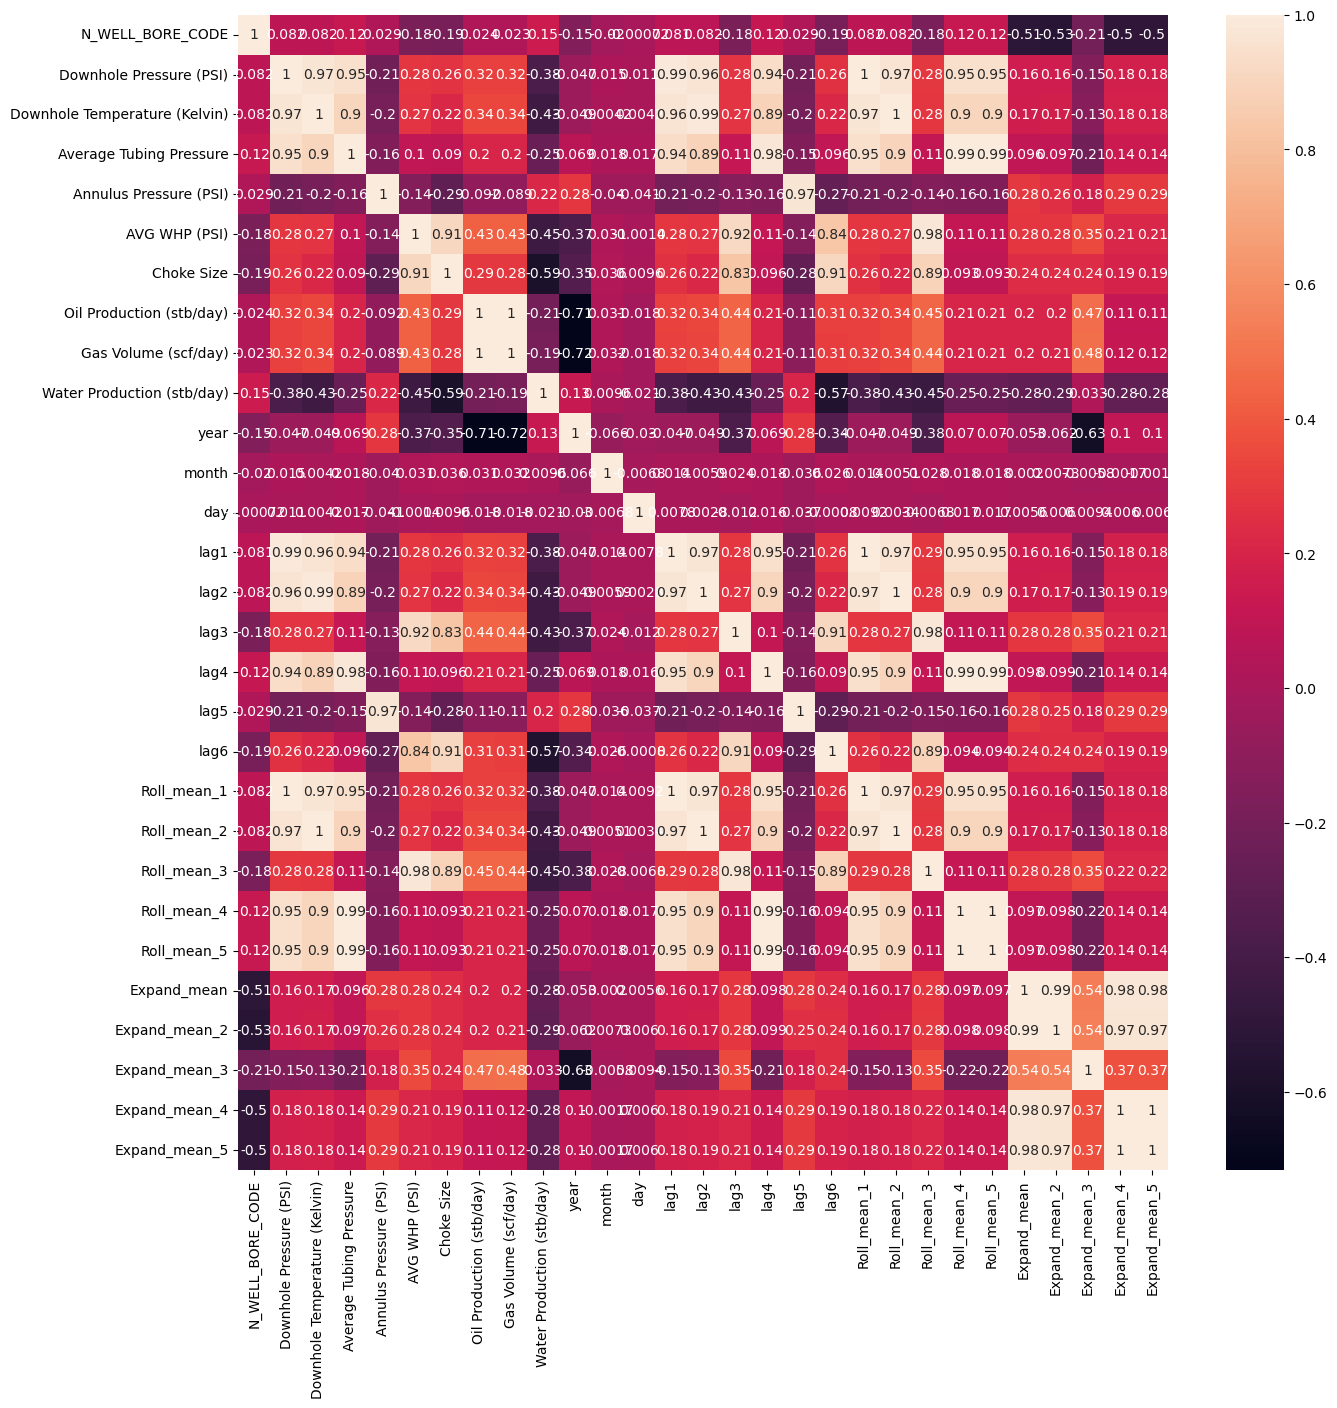

In [42]:
# Correlation with heatmaps to show the relation and multicolliniarity
rit = prod.select_dtypes(include = 'number').corr()

plt.figure(figsize = (15,15))
sns.heatmap(rit, annot = True)
plt.show()

In [43]:
prod.isnull().sum()

PRODUCTION DATE                     0
Field Name                          0
WELL_BORE_CODE                      0
N_WELL_BORE_CODE                    0
WellBore Name                       0
FLOW_KIND                           0
WELL_TYPE                           0
Downhole Pressure (PSI)             0
Downhole Temperature (Kelvin)       0
Average Tubing Pressure             0
Annulus Pressure (PSI)              0
AVG WHP (PSI)                       0
Choke Size                          6
Oil Production (stb/day)         2075
Gas Volume (scf/day)             2075
Water Production (stb/day)       2075
year                                0
month                               0
day                                 0
lag1                                1
lag2                                1
lag3                                1
lag4                                1
lag5                                1
lag6                                7
Roll_mean_1                         1
Roll_mean_2 

In [44]:
prod = prod.fillna(0)

In [45]:
prod =prod.replace(0, np.nan)

In [46]:
prod = prod.dropna()

In [47]:
prod.isnull().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       0
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
year                             0
month                            0
day                              0
lag1                             0
lag2                             0
lag3                             0
lag4                             0
lag5                             0
lag6                             0
Roll_mean_1                      0
Roll_mean_2                      0
Roll_mean_3                      0
Roll_mean_4         

In [48]:
prod.select_dtypes(include = 'number').columns

Index(['N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'year', 'month', 'day', 'lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6', 'Roll_mean_1', 'Roll_mean_2',
       'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5', 'Expand_mean',
       'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4', 'Expand_mean_5'],
      dtype='object')

In [49]:
# checking for outliers
 
cols = ['N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'year', 'month', 'day', 'lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6', 'Roll_mean_1',
       'Roll_mean_2', 'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5',
       'Expand_mean', 'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4',
       'Expand_mean_5']


Q1 = prod[cols].quantile(0.25)
Q3 = prod[cols].quantile(0.75)


IQR = Q3 - Q1


outliers = {}
for col in cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers[col] = prod[(prod[col] < lower_bound) | (prod[col] > upper_bound)]


for col, outlier_rows in outliers.items():
    print(f"Outliers in column {col}:")

Outliers in column N_WELL_BORE_CODE:
Outliers in column Downhole Pressure (PSI):
Outliers in column Downhole Temperature (Kelvin):
Outliers in column Average Tubing Pressure:
Outliers in column Annulus Pressure (PSI):
Outliers in column AVG WHP (PSI):
Outliers in column Choke Size:
Outliers in column Oil Production (stb/day):
Outliers in column Gas Volume (scf/day):
Outliers in column Water Production (stb/day):
Outliers in column year:
Outliers in column month:
Outliers in column day:
Outliers in column lag1:
Outliers in column lag2:
Outliers in column lag3:
Outliers in column lag4:
Outliers in column lag5:
Outliers in column lag6:
Outliers in column Roll_mean_1:
Outliers in column Roll_mean_2:
Outliers in column Roll_mean_3:
Outliers in column Roll_mean_4:
Outliers in column Roll_mean_5:
Outliers in column Expand_mean:
Outliers in column Expand_mean_2:
Outliers in column Expand_mean_3:
Outliers in column Expand_mean_4:
Outliers in column Expand_mean_5:


In [50]:
# feature selection 



numerical_cols = ['N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size', 'lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6','Roll_mean_1',
       'Roll_mean_2', 'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5',
       'Expand_mean', 'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4',
       'Expand_mean_5']

target_vars = ['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']

selected_features = {}


for target_var in target_vars:
    X = prod[numerical_cols]
    y = prod[target_var]
    
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    N = 6
    rfe = RFE(model, n_features_to_select=N)
    rfe.fit(X, y)
    

    top_features = [feature for feature, selected in zip(numerical_cols, rfe.support_) if selected]
    
    selected_features[target_var] = top_features

print("Selected features for each target variable:")
for target_var, features in selected_features.items():
    print(f"{target_var}: {features}")

Selected features for each target variable:
Oil Production (stb/day): ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'Choke Size', 'Expand_mean_2', 'Expand_mean_3']
Gas Volume (scf/day): ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Choke Size', 'Expand_mean', 'Expand_mean_2', 'Expand_mean_3']
Water Production (stb/day): ['Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size', 'lag4', 'Expand_mean_2']


In [51]:
# Splitting data into train and test


oil_features = ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'Choke Size', 'Expand_mean_2', 'Expand_mean_3']
gas_features = ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Choke Size', 'Expand_mean', 'Expand_mean_2', 'Expand_mean_3']
water_features = ['Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size', 'lag4', 'Expand_mean_2']


X_oil = prod[oil_features]
y_oil =prod['Oil Production (stb/day)']
X_oil_train, X_oil_test, y_oil_train, y_oil_test = train_test_split(X_oil, y_oil, test_size=0.2, random_state=42)

X_gas = prod[gas_features]
y_gas = prod['Gas Volume (scf/day)']
X_gas_train, X_gas_test, y_gas_train, y_gas_test = train_test_split(X_gas, y_gas, test_size=0.2, random_state=42)

X_water = prod[water_features]
y_water = prod['Water Production (stb/day)']
X_water_train, X_water_test, y_water_train, y_water_test = train_test_split(X_water, y_water, test_size=0.2, random_state=42)

In [52]:
# Define the search space for Bayesian optimization
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])

    
    oil_xgb = xgb.XGBRegressor(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'],max_depth=params['max_depth'], min_child_weight=params['min_child_weight'],subsample=params['subsample'], colsample_bytree=params['colsample_bytree'], random_state=42)
    
    gas_xgb = xgb.XGBRegressor(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'],max_depth=params['max_depth'], min_child_weight=params['min_child_weight'],subsample=params['subsample'], colsample_bytree=params['colsample_bytree'], random_state=42)
    
    water_xgb = xgb.XGBRegressor(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'],max_depth=params['max_depth'], min_child_weight=params['min_child_weight'],subsample=params['subsample'], colsample_bytree=params['colsample_bytree'], random_state=42)

    # Train models
    oil_xgb.fit(X_oil_train, y_oil_train)
    gas_xgb.fit(X_gas_train, y_gas_train)
    water_xgb.fit(X_water_train, y_water_train)

    # Predict using the trained models
    y_oil_pred_xgb = oil_xgb.predict(X_oil_test)
    y_gas_pred_xgb = gas_xgb.predict(X_gas_test)
    y_water_pred_xgb = water_xgb.predict(X_water_test)

    # Calculate MAPE
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape_oil = mape(y_oil_test, y_oil_pred_xgb)
    mape_gas = mape(y_gas_test, y_gas_pred_xgb)
    mape_water = mape(y_water_test, y_water_pred_xgb)

    return np.mean([mape_oil, mape_gas, mape_water])


trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)



oil_xgb = xgb.XGBRegressor(n_estimators=int(best['n_estimators']), learning_rate=best['learning_rate'],max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),subsample=best['subsample'], colsample_bytree=best['colsample_bytree'], random_state=42)

gas_xgb = xgb.XGBRegressor(n_estimators=int(best['n_estimators']), learning_rate=best['learning_rate'],max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),subsample=best['subsample'], colsample_bytree=best['colsample_bytree'], random_state=42)

water_xgb = xgb.XGBRegressor(n_estimators=int(best['n_estimators']), learning_rate=best['learning_rate'],max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),subsample=best['subsample'], colsample_bytree=best['colsample_bytree'], random_state=42)

oil_xgb.fit(X_oil_train, y_oil_train)
gas_xgb.fit(X_gas_train, y_gas_train)
water_xgb.fit(X_water_train, y_water_train)

y_oil_pred_xgb = oil_xgb.predict(X_oil_test)
y_gas_pred_xgb = gas_xgb.predict(X_gas_test)
y_water_pred_xgb = water_xgb.predict(X_water_test)

# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Oil Production (stb/day) - XGBoost - Mean Absolute Error:", mean_absolute_error(y_oil_test, y_oil_pred_xgb))
print("Oil Production (stb/day) - XGBoost - Mean Absolute Percentage Error:", mape(y_oil_test, y_oil_pred_xgb))

print("Gas Volume (scf/day) - XGBoost - Mean Absolute Error:", mean_absolute_error(y_gas_test, y_gas_pred_xgb))
print("Gas Volume (scf/day) - XGBoost - Mean Absolute Percentage Error:", mape(y_gas_test, y_gas_pred_xgb))

print("Water Production (stb/day) - XGBoost - Mean Absolute Error:", mean_absolute_error(y_water_test, y_water_pred_xgb))
print("Water Production (stb/day) - XGBoost - Mean Absolute Percentage Error:", mape(y_water_test, y_water_pred_xgb))

predicted_oil_values = y_oil_pred_xgb.tolist()
predicted_gas_values = y_gas_pred_xgb.tolist()
predicted_water_values = y_water_pred_xgb.tolist()

100%|████████████████████████████████████████████████| 50/50 [00:26<00:00,  1.89trial/s, best loss: 172.12186037254727]
Oil Production (stb/day) - XGBoost - Mean Absolute Error: 812.7085432928972
Oil Production (stb/day) - XGBoost - Mean Absolute Percentage Error: 52.41065671484799
Gas Volume (scf/day) - XGBoost - Mean Absolute Error: 643721.2773495413
Gas Volume (scf/day) - XGBoost - Mean Absolute Percentage Error: 41.11068227701636
Water Production (stb/day) - XGBoost - Mean Absolute Error: 847.0867508719333
Water Production (stb/day) - XGBoost - Mean Absolute Percentage Error: 422.84424212577744


In [53]:
space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1)
}


def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])

    oil_gb = GradientBoostingRegressor(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'], random_state=42)
    
    gas_gb = GradientBoostingRegressor(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'], random_state=42)
    
    water_gb = GradientBoostingRegressor(n_estimators=params['n_estimators'], learning_rate=params['learning_rate'], max_depth=params['max_depth'], random_state=42)

    
    # Train models
    oil_gb.fit(X_oil_train, y_oil_train)
    gas_gb.fit(X_gas_train, y_gas_train)
    water_gb.fit(X_water_train, y_water_train)

    # Predict using the trained models
    y_oil_pred_gb = oil_gb.predict(X_oil_test)
    y_gas_pred_gb = gas_gb.predict(X_gas_test)
    y_water_pred_gb = water_gb.predict(X_water_test)

    # Calculate MAPE
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape_oil = mape(y_oil_test, y_oil_pred_gb)
    mape_gas = mape(y_gas_test, y_gas_pred_gb)
    mape_water = mape(y_water_test, y_water_pred_gb)

    return np.mean([mape_oil, mape_gas, mape_water])


trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)



oil_gb = GradientBoostingRegressor(n_estimators=int(best['n_estimators']), learning_rate=best['learning_rate'], max_depth=int(best['max_depth']), random_state=42)

gas_gb = GradientBoostingRegressor(n_estimators=int(best['n_estimators']), learning_rate=best['learning_rate'], max_depth=int(best['max_depth']), random_state=42)

water_gb = GradientBoostingRegressor(n_estimators=int(best['n_estimators']), learning_rate=best['learning_rate'], max_depth=int(best['max_depth']), random_state=42)

oil_gb.fit(X_oil_train, y_oil_train)
gas_gb.fit(X_gas_train, y_gas_train)
water_gb.fit(X_water_train, y_water_train)

y_oil_pred_gb = oil_gb.predict(X_oil_test)
y_gas_pred_gb = gas_gb.predict(X_gas_test)
y_water_pred_gb = water_gb.predict(X_water_test)

# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Oil Production (stb/day) - Gradient Boosting - Mean Absolute Error:", mean_absolute_error(y_oil_test, y_oil_pred_gb))
print("Oil Production (stb/day) - Gradient Boosting - Mean Absolute Percentage Error:", mape(y_oil_test, y_oil_pred_gb))

print("Gas Volume (scf/day) - Gradient Boosting - Mean Absolute Error:", mean_absolute_error(y_gas_test, y_gas_pred_gb))
print("Gas Volume (scf/day) - Gradient Boosting - Mean Absolute Percentage Error:", mape(y_gas_test, y_gas_pred_gb))

print("Water Production (stb/day) - Gradient Boosting - Mean Absolute Error:", mean_absolute_error(y_water_test, y_water_pred_gb))
print("Water Production (stb/day) - Gradient Boosting - Mean Absolute Percentage Error:", mape(y_water_test, y_water_pred_gb))

predicted_oil_values = y_oil_pred_gb.tolist()
predicted_gas_values = y_gas_pred_gb.tolist()
predicted_water_values = y_water_pred_gb.tolist()


100%|████████████████████████████████████████████████| 50/50 [02:09<00:00,  2.59s/trial, best loss: 42.863795148079646]
Oil Production (stb/day) - Gradient Boosting - Mean Absolute Error: 774.081291429158
Oil Production (stb/day) - Gradient Boosting - Mean Absolute Percentage Error: 27.3620927755512
Gas Volume (scf/day) - Gradient Boosting - Mean Absolute Error: 661677.8871355562
Gas Volume (scf/day) - Gradient Boosting - Mean Absolute Percentage Error: 26.57930886504605
Water Production (stb/day) - Gradient Boosting - Mean Absolute Error: 806.0822552980728
Water Production (stb/day) - Gradient Boosting - Mean Absolute Percentage Error: 74.6499838036417


In [54]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1)
}


def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])

    oil_rf = RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], random_state=42)
    
    gas_rf = RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], random_state=42)
    
    water_rf = RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], random_state=42)

    # Train models
    oil_rf.fit(X_oil_train, y_oil_train)
    gas_rf.fit(X_gas_train, y_gas_train)
    water_rf.fit(X_water_train, y_water_train)

    # Predict using the trained models
    y_oil_pred_rf = oil_rf.predict(X_oil_test)
    y_gas_pred_rf = gas_rf.predict(X_gas_test)
    y_water_pred_rf = water_rf.predict(X_water_test)

    # Calculate MAPE
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape_oil = mape(y_oil_test, y_oil_pred_rf)
    mape_gas = mape(y_gas_test, y_gas_pred_rf)
    mape_water = mape(y_water_test, y_water_pred_rf)

    
    return np.mean([mape_oil, mape_gas, mape_water])


trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)

oil_rf = RandomForestRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), min_samples_split=int(best['min_samples_split']), min_samples_leaf=int(best['min_samples_leaf']), random_state=42)
gas_rf = RandomForestRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), min_samples_split=int(best['min_samples_split']), min_samples_leaf=int(best['min_samples_leaf']), random_state=42)
water_rf = RandomForestRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), min_samples_split=int(best['min_samples_split']), min_samples_leaf=int(best['min_samples_leaf']), random_state=42)

oil_rf.fit(X_oil_train, y_oil_train)
gas_rf.fit(X_gas_train, y_gas_train)
water_rf.fit(X_water_train, y_water_train)

y_oil_pred_rf = oil_rf.predict(X_oil_test)
y_gas_pred_rf = gas_rf.predict(X_gas_test)
y_water_pred_rf = water_rf.predict(X_water_test)

# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Oil Production (stb/day) - Random Forest - Mean Absolute Error:", mean_absolute_error(y_oil_test, y_oil_pred_rf))
print("Oil Production (stb/day) - Random Forest - Mean Absolute Percentage Error:", mape(y_oil_test, y_oil_pred_rf))

print("Gas Volume (scf/day) - Random Forest - Mean Absolute Error:", mean_absolute_error(y_gas_test, y_gas_pred_rf))
print("Gas Volume (scf/day) - Random Forest - Mean Absolute Percentage Error:", mape(y_gas_test, y_gas_pred_rf))

print("Water Production (stb/day) - Random Forest - Mean Absolute Error:", mean_absolute_error(y_water_test, y_water_pred_rf))
print("Water Production (stb/day) - Random Forest - Mean Absolute Percentage Error:", mape(y_water_test, y_water_pred_rf))


100%|█████████████████████████████████████████████████| 50/50 [03:08<00:00,  3.76s/trial, best loss: 73.08544971197244]
Oil Production (stb/day) - Random Forest - Mean Absolute Error: 626.8513560729042
Oil Production (stb/day) - Random Forest - Mean Absolute Percentage Error: 36.53871149585173
Gas Volume (scf/day) - Random Forest - Mean Absolute Error: 559744.0602801384
Gas Volume (scf/day) - Random Forest - Mean Absolute Percentage Error: 35.147448073780616
Water Production (stb/day) - Random Forest - Mean Absolute Error: 715.9199728458658
Water Production (stb/day) - Random Forest - Mean Absolute Percentage Error: 147.570189566285


In [55]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1)
}


def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])

    oil_rf = RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], random_state=42)
    
    gas_rf = RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], random_state=42)
    
    water_rf = RandomForestRegressor(n_estimators=params['n_estimators'], max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], random_state=42)

    # Train models
    oil_rf.fit(X_oil_train, y_oil_train)
    gas_rf.fit(X_gas_train, y_gas_train)
    water_rf.fit(X_water_train, y_water_train)

    # Predict using the trained models
    y_oil_pred_rf = oil_rf.predict(X_oil_test)
    y_gas_pred_rf = gas_rf.predict(X_gas_test)
    y_water_pred_rf = water_rf.predict(X_water_test)

    # Calculate MAPE
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    mape_oil = mape(y_oil_test, y_oil_pred_rf)
    mape_gas = mape(y_gas_test, y_gas_pred_rf)
    mape_water = mape(y_water_test, y_water_pred_rf)

    return np.mean([mape_oil, mape_gas, mape_water])


trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=50, trials=trials)


oil_rf = RandomForestRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), min_samples_split=int(best['min_samples_split']), min_samples_leaf=int(best['min_samples_leaf']), random_state=42)

gas_rf = RandomForestRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), min_samples_split=int(best['min_samples_split']), min_samples_leaf=int(best['min_samples_leaf']), random_state=42)

water_rf = RandomForestRegressor(n_estimators=int(best['n_estimators']), max_depth=int(best['max_depth']), min_samples_split=int(best['min_samples_split']), min_samples_leaf=int(best['min_samples_leaf']), random_state=42)

oil_rf.fit(X_oil_train, y_oil_train)
gas_rf.fit(X_gas_train, y_gas_train)
water_rf.fit(X_water_train, y_water_train)

# Save the trained models
with open('oil_production_model.pkl', 'wb') as f:
    pickle.dump(oil_rf, f)

with open('gas_volume_model.pkl', 'wb') as f:
    pickle.dump(gas_rf, f)

with open('water_production_model.pkl', 'wb') as f:
    pickle.dump(water_rf, f)


# Print model performance
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_oil_pred_rf = oil_rf.predict(X_oil_test)
y_gas_pred_rf = gas_rf.predict(X_gas_test)
y_water_pred_rf = water_rf.predict(X_water_test)

print("Oil Production (stb/day) - Random Forest - Mean Absolute Error:", mean_absolute_error(y_oil_test, y_oil_pred_rf))
print("Oil Production (stb/day) - Random Forest - Mean Absolute Percentage Error:", mape(y_oil_test, y_oil_pred_rf))

print("Gas Volume (scf/day) - Random Forest - Mean Absolute Error:", mean_absolute_error(y_gas_test, y_gas_pred_rf))
print("Gas Volume (scf/day) - Random Forest - Mean Absolute Percentage Error:", mape(y_gas_test, y_gas_pred_rf))

print("Water Production (stb/day) - Random Forest - Mean Absolute Error:", mean_absolute_error(y_water_test, y_water_pred_rf))
print("Water Production (stb/day) - Mean Absolute Percentage Error:", mape(y_water_test, y_water_pred_rf))

100%|█████████████████████████████████████████████████| 50/50 [04:19<00:00,  5.19s/trial, best loss: 82.13491535217503]
Oil Production (stb/day) - Random Forest - Mean Absolute Error: 618.5034419159435
Oil Production (stb/day) - Random Forest - Mean Absolute Percentage Error: 36.57281235713295
Gas Volume (scf/day) - Random Forest - Mean Absolute Error: 560226.496571797
Gas Volume (scf/day) - Random Forest - Mean Absolute Percentage Error: 34.54755990807959
Water Production (stb/day) - Random Forest - Mean Absolute Error: 711.3716365170434
Water Production (stb/day) - Mean Absolute Percentage Error: 175.28437379131253


In [56]:
# Loading validation dataset

predict = pd.read_csv("dseats_2024_validation_dataset.csv", parse_dates=[0])

In [57]:
predict.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-01      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
1      2015-07-02      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
2      2015-07-03      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
3      2015-07-04      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
4      2015-07-05      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3061.253047   
1  production        OP              3247.951135   
2  production        OP              3333.012485   
3  production        OP              3404.022465   
4  production        OP              3465.473030   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                     380.665745              2659.809580   
1                     376.759980              2547.453670   
2                     375.985300              2533.912265   
3                     375.419010              2481.804485   
4                     375.004710              2408.310945   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0     401.443468    0.491632   
1                     0.0     700.497465   21.775180   
2                     0.0     799.100220   27.638780   
3                     0.0     922.217980   36.178940   
4                     0.0    1057.162085   45.424140   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  
0                       NaN                   NaN                         NaN  
1                       NaN                   NaN                         NaN  
2                       NaN                   NaN                         NaN  
3                       NaN                   NaN                         NaN  
4                       NaN                   NaN                         NaN

In [58]:
predict.describe().T

count         mean          std     min  \
N_WELL_BORE_CODE               2075.0   107.142651     1.354975  105.00   
Downhole Pressure (PSI)        2075.0  2770.769569  1604.414730    0.00   
Downhole Temperature (Kelvin)  2075.0   351.655653    44.088178  273.15   
Average Tubing Pressure        2075.0  2447.863733  1279.839703    0.00   
Annulus Pressure (PSI)         2075.0   197.054017   119.151822    0.00   
AVG WHP (PSI)                  2075.0   487.723448   337.834866    0.00   
Choke Size                     2075.0    11.566877    21.912249    0.00   
Oil Production (stb/day)          0.0          NaN          NaN     NaN   
Gas Volume (scf/day)              0.0          NaN          NaN     NaN   
Water Production (stb/day)        0.0          NaN          NaN     NaN   

                                       25%          50%          75%  \
N_WELL_BORE_CODE                106.000000   107.000000   108.000000   
Downhole Pressure (PSI)        2899.657187  3364.224336  3864.667975   
Downhole Temperature (Kelvin)   363.184330   374.267440   379.090599   
Average Tubing Pressure        2352.860553  2736.140974  3417.707239   
Annulus Pressure (PSI)          131.693688   219.994048   296.054719   
AVG WHP (PSI)                   385.785438   417.627583   464.401766   
Choke Size                        1.533683     3.402087     9.161726   
Oil Production (stb/day)               NaN          NaN          NaN   
Gas Volume (scf/day)                   NaN          NaN          NaN   
Water Production (stb/day)             NaN          NaN          NaN   

                                       max  
N_WELL_BORE_CODE                109.000000  
Downhole Pressure (PSI)        5765.033975  
Downhole Temperature (Kelvin)   381.442244  
Average Tubing Pressure        5015.648165  
Annulus Pressure (PSI)          413.071107  
AVG WHP (PSI)                  1819.765515  
Choke Size                      109.781900  
Oil Production (stb/day)               NaN  
Gas Volume (scf/day)                   NaN  
Water Production (stb/day)             NaN

In [59]:
predict.isnull().sum()

PRODUCTION DATE                  7845
Field Name                       7845
WELL_BORE_CODE                   7845
N_WELL_BORE_CODE                 7845
WellBore Name                    7845
FLOW_KIND                        7845
WELL_TYPE                        7845
Downhole Pressure (PSI)          7845
Downhole Temperature (Kelvin)    7845
Average Tubing Pressure          7845
Annulus Pressure (PSI)           7845
AVG WHP (PSI)                    7845
Choke Size                       7845
Oil Production (stb/day)         9920
Gas Volume (scf/day)             9920
Water Production (stb/day)       9920
dtype: int64

In [60]:
spe = predict.copy()

In [61]:
spe['year'] = predict['PRODUCTION DATE'].dt.year

In [62]:
spe['month'] = predict['PRODUCTION DATE'].dt.month

In [63]:
spe['data'] = predict['PRODUCTION DATE'].dt.day

In [64]:
spe.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-01      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
1      2015-07-02      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
2      2015-07-03      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
3      2015-07-04      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
4      2015-07-05      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3061.253047   
1  production        OP              3247.951135   
2  production        OP              3333.012485   
3  production        OP              3404.022465   
4  production        OP              3465.473030   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  \
0                     380.665745              2659.809580   
1                     376.759980              2547.453670   
2                     375.985300              2533.912265   
3                     375.419010              2481.804485   
4                     375.004710              2408.310945   

   Annulus Pressure (PSI)  AVG WHP (PSI)  Choke Size  \
0                     0.0     401.443468    0.491632   
1                     0.0     700.497465   21.775180   
2                     0.0     799.100220   27.638780   
3                     0.0     922.217980   36.178940   
4                     0.0    1057.162085   45.424140   

   Oil Production (stb/day)  Gas Volume (scf/day)  Water Production (stb/day)  \
0                       NaN                   NaN                         NaN   
1                       NaN                   NaN                         NaN   
2                       NaN                   NaN                         NaN   
3                       NaN                   NaN                         NaN   
4                       NaN                   NaN                         NaN   

     year  month  data  
0  2015.0    7.0   1.0  
1  2015.0    7.0   2.0  
2  2015.0    7.0   3.0  
3  2015.0    7.0   4.0  
4  2015.0    7.0   5.0

In [65]:
spe['lag1'] = predict['Downhole Pressure (PSI)'].shift(1)

In [66]:
spe['lag2'] = predict['Downhole Temperature (Kelvin)'].shift(1)

In [67]:
spe['lag3'] = predict['AVG WHP (PSI)'].shift(1)

In [68]:
spe['lag4'] = predict['Average Tubing Pressure'].shift(1)

In [69]:
spe['lag5'] = predict['Annulus Pressure (PSI)'].shift(1)

In [70]:
spe['lag6'] = predict['Choke Size'].shift(1)

In [71]:
spe.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-01      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
1      2015-07-02      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
2      2015-07-03      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
3      2015-07-04      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
4      2015-07-05      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3061.253047   
1  production        OP              3247.951135   
2  production        OP              3333.012485   
3  production        OP              3404.022465   
4  production        OP              3465.473030   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...  \
0                     380.665745              2659.809580  ...   
1                     376.759980              2547.453670  ...   
2                     375.985300              2533.912265  ...   
3                     375.419010              2481.804485  ...   
4                     375.004710              2408.310945  ...   

   Water Production (stb/day)    year  month  data         lag1        lag2  \
0                         NaN  2015.0    7.0   1.0          NaN         NaN   
1                         NaN  2015.0    7.0   2.0  3061.253047  380.665745   
2                         NaN  2015.0    7.0   3.0  3247.951135  376.759980   
3                         NaN  2015.0    7.0   4.0  3333.012485  375.985300   
4                         NaN  2015.0    7.0   5.0  3404.022465  375.419010   

         lag3         lag4  lag5       lag6  
0         NaN          NaN   NaN        NaN  
1  401.443468  2659.809580   0.0   0.491632  
2  700.497465  2547.453670   0.0  21.775180  
3  799.100220  2533.912265   0.0  27.638780  
4  922.217980  2481.804485   0.0  36.178940  

[5 rows x 25 columns]

In [72]:
spe['Roll_mean_1'] = predict['Downhole Pressure (PSI)'].rolling(window = 2).mean()

In [73]:
spe['Roll_mean_2'] = predict['Downhole Temperature (Kelvin)'].rolling(window = 2).mean()

In [74]:
spe['Roll_mean_3'] = predict['AVG WHP (PSI)'].rolling(window = 2).mean()

In [75]:
spe['Roll_mean_4'] = predict['Average Tubing Pressure'].rolling(window = 2).mean()

In [76]:
spe['Roll_mean_5'] = predict['Average Tubing Pressure'].rolling(window = 2).mean()

In [77]:
spe.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-01      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
1      2015-07-02      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
2      2015-07-03      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
3      2015-07-04      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
4      2015-07-05      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3061.253047   
1  production        OP              3247.951135   
2  production        OP              3333.012485   
3  production        OP              3404.022465   
4  production        OP              3465.473030   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...        lag2  \
0                     380.665745              2659.809580  ...         NaN   
1                     376.759980              2547.453670  ...  380.665745   
2                     375.985300              2533.912265  ...  376.759980   
3                     375.419010              2481.804485  ...  375.985300   
4                     375.004710              2408.310945  ...  375.419010   

         lag3         lag4  lag5       lag6  Roll_mean_1  Roll_mean_2  \
0         NaN          NaN   NaN        NaN          NaN          NaN   
1  401.443468  2659.809580   0.0   0.491632  3154.602091   378.712862   
2  700.497465  2547.453670   0.0  21.775180  3290.481810   376.372640   
3  799.100220  2533.912265   0.0  27.638780  3368.517475   375.702155   
4  922.217980  2481.804485   0.0  36.178940  3434.747748   375.211860   

   Roll_mean_3  Roll_mean_4  Roll_mean_5  
0          NaN          NaN          NaN  
1   550.970466  2603.631625  2603.631625  
2   749.798843  2540.682967  2540.682967  
3   860.659100  2507.858375  2507.858375  
4   989.690033  2445.057715  2445.057715  

[5 rows x 30 columns]

In [78]:
spe['Expand_mean'] = predict['Downhole Pressure (PSI)'].expanding().mean()

In [79]:
spe['Expand_mean_2'] = predict['Downhole Temperature (Kelvin)'].expanding().mean()

In [80]:
spe['Expand_mean_3'] = predict['AVG WHP (PSI)'].expanding().mean()

In [81]:
spe['Expand_mean_4'] = predict['Average Tubing Pressure'].expanding().mean()

In [82]:
spe['Expand_mean_5'] = predict['Average Tubing Pressure'].expanding().mean()

In [83]:
spe.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-01      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
1      2015-07-02      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
2      2015-07-03      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
3      2015-07-04      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
4      2015-07-05      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3061.253047   
1  production        OP              3247.951135   
2  production        OP              3333.012485   
3  production        OP              3404.022465   
4  production        OP              3465.473030   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...  Roll_mean_1  \
0                     380.665745              2659.809580  ...          NaN   
1                     376.759980              2547.453670  ...  3154.602091   
2                     375.985300              2533.912265  ...  3290.481810   
3                     375.419010              2481.804485  ...  3368.517475   
4                     375.004710              2408.310945  ...  3434.747748   

   Roll_mean_2  Roll_mean_3  Roll_mean_4  Roll_mean_5  Expand_mean  \
0          NaN          NaN          NaN          NaN  3061.253047   
1   378.712862   550.970466  2603.631625  2603.631625  3154.602091   
2   376.372640   749.798843  2540.682967  2540.682967  3214.072222   
3   375.702155   860.659100  2507.858375  2507.858375  3261.559783   
4   375.211860   989.690033  2445.057715  2445.057715  3302.342432   

   Expand_mean_2  Expand_mean_3  Expand_mean_4  Expand_mean_5  
0     380.665745     401.443468    2659.809580    2659.809580  
1     378.712862     550.970466    2603.631625    2603.631625  
2     377.803675     633.680384    2580.391838    2580.391838  
3     377.207509     705.814783    2555.745000    2555.745000  
4     376.766949     776.084244    2526.258189    2526.258189  

[5 rows x 35 columns]

In [84]:
spe.isnull().sum()

PRODUCTION DATE                  7845
Field Name                       7845
WELL_BORE_CODE                   7845
N_WELL_BORE_CODE                 7845
WellBore Name                    7845
FLOW_KIND                        7845
WELL_TYPE                        7845
Downhole Pressure (PSI)          7845
Downhole Temperature (Kelvin)    7845
Average Tubing Pressure          7845
Annulus Pressure (PSI)           7845
AVG WHP (PSI)                    7845
Choke Size                       7845
Oil Production (stb/day)         9920
Gas Volume (scf/day)             9920
Water Production (stb/day)       9920
year                             7845
month                            7845
data                             7845
lag1                             7845
lag2                             7845
lag3                             7845
lag4                             7845
lag5                             7845
lag6                             7845
Roll_mean_1                      7846
Roll_mean_2 

In [85]:
columns_to_consider = ['N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
        'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'lag6', 'Roll_mean_1', 'Roll_mean_2', 'Roll_mean_3', 'Roll_mean_4',
       'Roll_mean_5', 'Expand_mean', 'Expand_mean_2', 'Expand_mean_3',
       'Expand_mean_4', 'Expand_mean_5']

cleaned_data = spe.dropna(subset=columns_to_consider)

cleaned_data = cleaned_data.reset_index(drop=True)

In [86]:
cleaned_data.head()

PRODUCTION DATE Field Name   WELL_BORE_CODE  N_WELL_BORE_CODE WellBore Name  \
0      2015-07-02      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
1      2015-07-03      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
2      2015-07-04      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
3      2015-07-05      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   
4      2015-07-06      DSEAT  DSEAT-001-F-1 C             105.0     001-F-1 C   

    FLOW_KIND WELL_TYPE  Downhole Pressure (PSI)  \
0  production        OP              3247.951135   
1  production        OP              3333.012485   
2  production        OP              3404.022465   
3  production        OP              3465.473030   
4  production        OP              3528.245995   

   Downhole Temperature (Kelvin)  Average Tubing Pressure  ...  Roll_mean_1  \
0                      376.75998              2547.453670  ...  3154.602091   
1                      375.98530              2533.912265  ...  3290.481810   
2                      375.41901              2481.804485  ...  3368.517475   
3                      375.00471              2408.310945  ...  3434.747748   
4                      374.67122              2329.113395  ...  3496.859513   

   Roll_mean_2  Roll_mean_3  Roll_mean_4  Roll_mean_5  Expand_mean  \
0   378.712862   550.970466  2603.631625  2603.631625  3154.602091   
1   376.372640   749.798843  2540.682967  2540.682967  3214.072222   
2   375.702155   860.659100  2507.858375  2507.858375  3261.559783   
3   375.211860   989.690033  2445.057715  2445.057715  3302.342432   
4   374.837965  1128.147342  2368.712170  2368.712170  3339.993026   

   Expand_mean_2  Expand_mean_3  Expand_mean_4  Expand_mean_5  
0     378.712862     550.970466    2603.631625    2603.631625  
1     377.803675     633.680384    2580.391838    2580.391838  
2     377.207509     705.814783    2555.745000    2555.745000  
3     376.766949     776.084244    2526.258189    2526.258189  
4     376.417661     846.592303    2493.400723    2493.400723  

[5 rows x 35 columns]

In [87]:
cleaned_data.describe()

N_WELL_BORE_CODE  Downhole Pressure (PSI)  \
count       2074.000000              2074.000000   
mean         107.143684              2770.629510   
std            1.354484              1604.788974   
min          105.000000                 0.000000   
25%          106.000000              2899.601577   
50%          107.000000              3364.281361   
75%          108.000000              3864.767645   
max          109.000000              5765.033975   

       Downhole Temperature (Kelvin)  Average Tubing Pressure  \
count                    2074.000000              2074.000000   
mean                      351.641666              2447.761541   
std                        44.094205              1280.139890   
min                       273.150000                 0.000000   
25%                       363.184330              2351.985441   
50%                       374.267230              2736.901977   
75%                       379.090320              3417.794203   
max                       381.442244              5015.648165   

       Annulus Pressure (PSI)  AVG WHP (PSI)   Choke Size  \
count             2074.000000    2074.000000  2074.000000   
mean               197.149028     487.765048    11.572217   
std                119.101909     337.911025    21.916183   
min                  0.000000       0.000000     0.000000   
25%                134.818740     385.777445     1.533915   
50%                220.002334     417.684665     3.404928   
75%                296.069698     464.549206     9.168128   
max                413.071107    1819.765515   109.781900   

       Oil Production (stb/day)  Gas Volume (scf/day)  \
count                       0.0                   0.0   
mean                        NaN                   NaN   
std                         NaN                   NaN   
min                         NaN                   NaN   
25%                         NaN                   NaN   
50%                         NaN                   NaN   
75%                         NaN                   NaN   
max                         NaN                   NaN   

       Water Production (stb/day)  ...  Roll_mean_1  Roll_mean_2  Roll_mean_3  \
count                         0.0  ...  2074.000000  2074.000000  2074.000000   
mean                          NaN  ...  2770.158344   351.645880   487.861828   
std                           NaN  ...  1599.822319    43.989129   330.684454   
min                           NaN  ...     0.000000   273.150000     0.000000   
25%                           NaN  ...  2898.337155   363.184330   386.259022   
50%                           NaN  ...  3356.905133   374.290500   419.503440   
75%                           NaN  ...  3865.784449   379.078541   463.727953   
max                           NaN  ...  5338.240032   381.434459  1814.023588   

       Roll_mean_4  Roll_mean_5  Expand_mean  Expand_mean_2  Expand_mean_3  \
count  2074.000000  2074.000000  2074.000000    2074.000000    2074.000000   
mean   2447.193595  2447.193595  2980.104664     359.324092     621.872859   
std    1274.379238  1274.379238   524.140195      15.079862     156.478981   
min       0.000000     0.000000  2212.840595     338.706074     485.860226   
25%    2349.703014  2349.703014  2565.736185     345.962582     506.118008   
50%    2737.369168  2737.369168  2697.715504     351.402993     552.427895   
75%    3417.680880  3417.680880  3533.028615     377.335729     698.575274   
max    5015.648165  5015.648165  3838.925409     378.712862    1389.861758   

       Expand_mean_4  Expand_mean_5  
count    2074.000000    2074.000000  
mean     2485.426183    2485.426183  
std       296.870750     296.870750  
min      1967.010471    1967.010471  
25%      2280.668899    2280.668899  
50%      2357.582023    2357.582023  
75%      2815.863558    2815.863558  
max      2933.323834    2933.323834  

[8 rows x 29 columns]

In [88]:
cleaned_data.select_dtypes(include = 'number').columns

Index(['N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'year', 'month', 'data', 'lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6', 'Roll_mean_1', 'Roll_mean_2',
       'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5', 'Expand_mean',
       'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4', 'Expand_mean_5'],
      dtype='object')

In [89]:
# checking for outliers
 
cols = ['N_WELL_BORE_CODE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)', 'lag1', 'lag2',
       'lag3', 'lag4', 'lag5', 'lag6',  'Roll_mean_1',
       'Roll_mean_2', 'Roll_mean_3', 'Roll_mean_4', 'Roll_mean_5',
       'Expand_mean', 'Expand_mean_2', 'Expand_mean_3', 'Expand_mean_4',
       'Expand_mean_5']


Q1 = cleaned_data[cols].quantile(0.25)
Q3 = cleaned_data[cols].quantile(0.75)


IQR = Q3 - Q1


outliers = {}
for col in cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers[col] = cleaned_data[(cleaned_data[col] < lower_bound) | (cleaned_data[col] > upper_bound)]


for col, outlier_rows in outliers.items():
    print(f"Outliers in column {col}:")

Outliers in column N_WELL_BORE_CODE:
Outliers in column Downhole Pressure (PSI):
Outliers in column Downhole Temperature (Kelvin):
Outliers in column Average Tubing Pressure:
Outliers in column Annulus Pressure (PSI):
Outliers in column AVG WHP (PSI):
Outliers in column Choke Size:
Outliers in column Oil Production (stb/day):
Outliers in column Gas Volume (scf/day):
Outliers in column Water Production (stb/day):
Outliers in column lag1:
Outliers in column lag2:
Outliers in column lag3:
Outliers in column lag4:
Outliers in column lag5:
Outliers in column lag6:
Outliers in column Roll_mean_1:
Outliers in column Roll_mean_2:
Outliers in column Roll_mean_3:
Outliers in column Roll_mean_4:
Outliers in column Roll_mean_5:
Outliers in column Expand_mean:
Outliers in column Expand_mean_2:
Outliers in column Expand_mean_3:
Outliers in column Expand_mean_4:
Outliers in column Expand_mean_5:


In [90]:
val_prodd = cleaned_data


numerical_cols = ['Downhole Pressure (PSI)', 'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'Choke Size', 'Expand_mean_2', 'Expand_mean_3']

# Load the pre-trained models
with open('oil_production_model.pkl', 'rb') as f:
    oil_production_model = pickle.load(f)

with open('gas_volume_model.pkl', 'rb') as f:
    gas_volume_model = pickle.load(f)

with open('water_production_model.pkl', 'rb') as f:
    water_production_model = pickle.load(f)

# Predict the missing values for each target variable
val_prodd['Oil Production (stb/day)'] = oil_production_model.predict(val_prodd[numerical_cols])
val_prodd['Gas Volume (scf/day)'] = gas_volume_model.predict(val_prodd[numerical_cols])
val_prodd['Water Production (stb/day)'] = water_production_model.predict(val_prodd[numerical_cols])

# Save the predictions to a new CSV file
predicted_file_path = 'predicted_dseats_2024_validation_dataset.csv'
val_prodd.to_csv(predicted_file_path, index=False)

print(f"Predicted values saved to {predicted_file_path}")


Predicted values saved to predicted_dseats_2024_validation_dataset.csv


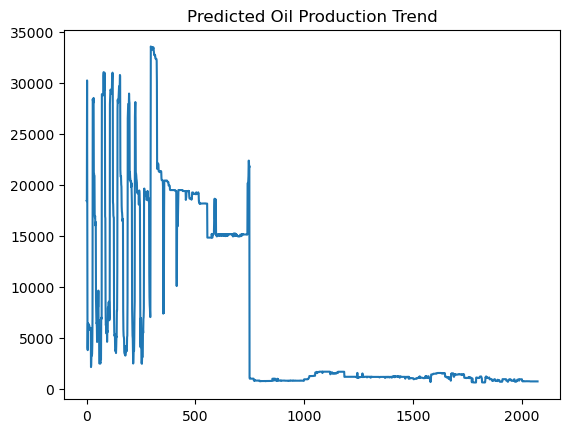

In [91]:
cleaned_data['Oil Production (stb/day)'].plot()
plt.title('Predicted Oil Production Trend')
plt.show()

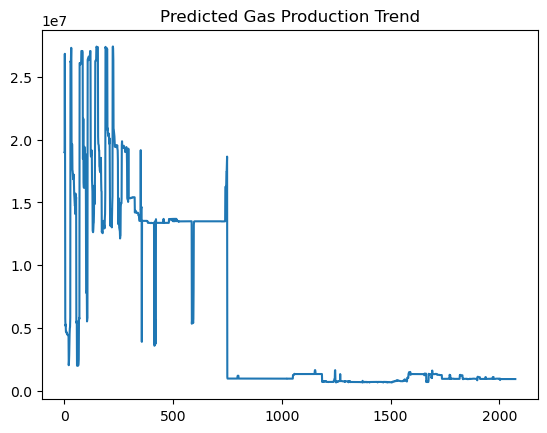

In [92]:
cleaned_data['Gas Volume (scf/day)'].plot()
plt.title('Predicted Gas Production Trend')
plt.show()

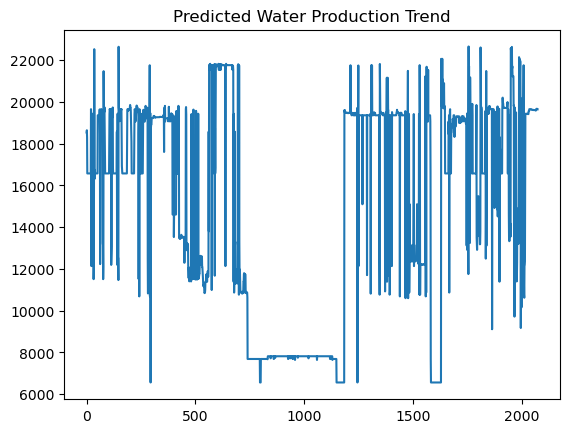

In [93]:
cleaned_data['Water Production (stb/day)'].plot()
plt.title('Predicted Water Production Trend')
plt.show()